### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

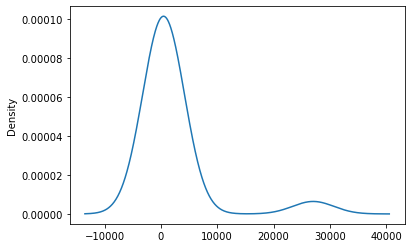

In [5]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_type_count = application_df.CLASSIFICATION.value_counts()
class_type_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

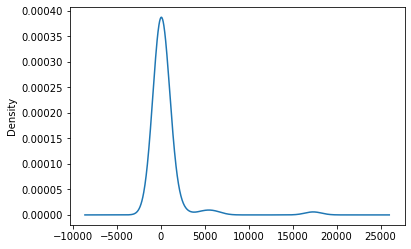

In [8]:
# Visualize the value counts of CLASSIFICATION
class_type_count.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_type_count[class_type_count < 1880].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\jsjer\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
train_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(application_cat, 1)


C:\Users\jsjer\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [13]:
# Split our preprocessed data into our features and target arrays
y = train_df["IS_SUCCESSFUL"].values
X = train_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

C:\Users\jsjer\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
X_train

array([[1.000000e+00, 5.000000e+03, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 3.531390e+05, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 5.402400e+04, 0.000000e+00, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00],
       ...,
       [1.000000e+00, 5.000000e+03, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 4.564513e+06, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.000000e+00, 5.000000e+03, 0.000000e+00, ..., 0.000000e+00,
        1.000000e+00, 0.000000e+00]])

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 =30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [24]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 5:11 - loss: 574.8096 - accuracy: 0.4062
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 10/804 [..............................] - ETA: 5s - loss: 3128.1279 - accuracy: 0.4594 
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 7616.6729 - accuracy: 0.4531
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 6871.9893 - accuracy: 0.4583
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 7414.1279 - accuracy: 0.4625
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to

415/804 [==============>...............] - ETA: 2s - loss: 20412.2070 - accuracy: 0.4944
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 20166.1777 - accuracy: 0.4937
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 21387.0645 - accuracy: 0.4933
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 23056.6621 - accuracy: 0.4926
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
465/804 [================>.............] - ETA: 1s - loss: 22723.996

 51/804 [>.............................] - ETA: 3s - loss: 8534.0059 - accuracy: 0.5392 
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 7275.3115 - accuracy: 0.5327
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 11356.5234 - accuracy: 0.5226
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 11223.5586 - accuracy: 0.5127
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 10295.1631


Epoch 00002: saving model to checkpoints\weights.02.hdf5
508/804 [=================>............] - ETA: 1s - loss: 37480.0039 - accuracy: 0.5020
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 36633.8750 - accuracy: 0.5031
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 35807.9453 - accuracy: 0.5015
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 35159.7656 - accuracy: 0.5003
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
559/804 [=


Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 18075.2852 - accuracy: 0.5084
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
157/804 [====>.........................] - ETA: 2s - loss: 16382.9492 - accuracy: 0.5058
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
172/804 [=====>........................] - ETA: 2s - loss: 15025.2822 - accuracy: 0.5013
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 14008.9922 - accuracy: 0.4988
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 000


Epoch 00003: saving model to checkpoints\weights.03.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 27647.5742 - accuracy: 0.4933
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 27356.3105 - accuracy: 0.4927
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 26884.6016 - accuracy: 0.4920
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 26377.5215 - accuracy: 0.4908
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
636/804 [=


Epoch 00004: saving model to checkpoints\weights.04.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 2131.9941 - accuracy: 0.4985
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 2586.1472 - accuracy: 0.4986
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 3570.1135 - accuracy: 0.4950
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 3673.3953 - accuracy: 0.4933
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 5376.7656 - a

657/804 [=======================>......] - ETA: 0s - loss: 27513.3828 - accuracy: 0.4775
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
668/804 [=======================>......] - ETA: 0s - loss: 27246.5859 - accuracy: 0.4775
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 26658.9277 - accuracy: 0.4780
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 26208.3594 - accuracy: 0.4789
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
708/804 [=

289/804 [=========>....................] - ETA: 2s - loss: 7127.8936 - accuracy: 0.4883
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 6860.5591 - accuracy: 0.4886
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 6699.1616 - accuracy: 0.4880
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 6440.6519 - accuracy: 0.4877
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
344/804 [=====


Epoch 00005: saving model to checkpoints\weights.05.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 9092.8936 - accuracy: 0.4989
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 8923.8340 - accuracy: 0.4989
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 8790.1836 - accuracy: 0.5000
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
784/804 [============================>.] - ETA: 0s - loss: 8725.3994 - accuracy: 0.5002
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: 

389/804 [=============>................] - ETA: 1s - loss: 8701.3242 - accuracy: 0.4999
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
400/804 [=============>................] - ETA: 1s - loss: 8571.7158 - accuracy: 0.4980
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 9435.6553 - accuracy: 0.4974
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 10649.6816 - accuracy: 0.4954
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006:

 26/804 [..............................] - ETA: 3s - loss: 6696.2246 - accuracy: 0.4495
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 4700.5869 - accuracy: 0.4719
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 3938.1348 - accuracy: 0.4896
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 4328.5078 - accuracy: 0.4910
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
 81/804 [==>..

471/804 [================>.............] - ETA: 1s - loss: 27609.0723 - accuracy: 0.4900
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
486/804 [=================>............] - ETA: 1s - loss: 26847.1250 - accuracy: 0.4890
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
501/804 [=================>............] - ETA: 1s - loss: 26106.5488 - accuracy: 0.4887
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 25507.9590 - accuracy: 0.4873
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 000


Epoch 00008: saving model to checkpoints\weights.08.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 5655.4146 - accuracy: 0.4855
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 5656.2715 - accuracy: 0.4886
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 8894.8486 - accuracy: 0.4898
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
145/804 [====>.........................] - ETA: 3s - loss: 8154.8804 - accuracy: 0.4948
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
157/804 [====>

552/804 [===================>..........] - ETA: 1s - loss: 5369.0288 - accuracy: 0.4919
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 5238.5488 - accuracy: 0.4930
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 5160.0542 - accuracy: 0.4935
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 5056.0059 - accuracy: 0.4935
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 5332.8110 - a


Epoch 00009: saving model to checkpoints\weights.09.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 4435.0142 - accuracy: 0.4983
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 4987.8857 - accuracy: 0.4978
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 4952.4004 - accuracy: 0.4940
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 5060.2871 - accuracy: 0.4931
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: 

668/804 [=======================>......] - ETA: 0s - loss: 7853.2061 - accuracy: 0.5006
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 7705.8174 - accuracy: 0.5004
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 7574.0381 - accuracy: 0.5012
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 7426.2368 - accuracy: 0.5015
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 7320.9209 - a

314/804 [==========>...................] - ETA: 2s - loss: 3384.0588 - accuracy: 0.5231
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 3304.5403 - accuracy: 0.5208
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 4435.2461 - accuracy: 0.5193
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
356/804 [============>.................] - ETA: 1s - loss: 4491.8008 - accuracy: 0.5205
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
369/804 [=====

769/804 [===========================>..] - ETA: 0s - loss: 7809.9863 - accuracy: 0.5126
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
784/804 [============================>.] - ETA: 0s - loss: 7734.9951 - accuracy: 0.5122
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
799/804 [============================>.] - ETA: 0s - loss: 7643.9297 - accuracy: 0.5114
Epoch 00010: saving model to checkpoints\weights.10.hdf5
804/804 [==============================] - 4s 4ms/step - loss: 7636.5044 - accuracy: 0.5116
Epoch 11/100
  1/804 [..............................] - ETA: 0s - loss: 22.6009 - accuracy: 0.4062
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model 

425/804 [==============>...............] - ETA: 1s - loss: 858.9988 - accuracy: 0.5362
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 897.2971 - accuracy: 0.5394
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 876.5388 - accuracy: 0.5412
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
465/804 [================>.............] - ETA: 1s - loss: 859.3745 - accuracy: 0.5405
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
480/804 [=========

 76/804 [=>............................] - ETA: 3s - loss: 778.2144 - accuracy: 0.5370
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 693.9266 - accuracy: 0.5347
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 605.3594 - accuracy: 0.5324
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 602.5573 - accuracy: 0.5400
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: savi


Epoch 00012: saving model to checkpoints\weights.12.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 1413.9525 - accuracy: 0.5243
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 1577.1445 - accuracy: 0.5215
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 1551.1677 - accuracy: 0.5200
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 3764.6023 - accuracy: 0.5193
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: 


Epoch 00013: saving model to checkpoints\weights.13.hdf5
207/804 [======>.......................] - ETA: 2s - loss: 557.1561 - accuracy: 0.5110
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 610.6894 - accuracy: 0.5101
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 644.7117 - accuracy: 0.5058
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 765.6797 - accuracy: 0.5037
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: savi

672/804 [========================>.....] - ETA: 0s - loss: 1517.6361 - accuracy: 0.5179
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 1484.8424 - accuracy: 0.5179
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 1453.4713 - accuracy: 0.5185
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 1423.4838 - accuracy: 0.5183
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: 

318/804 [==========>...................] - ETA: 2s - loss: 5575.1021 - accuracy: 0.5024
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 5446.9414 - accuracy: 0.5016
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 5355.7837 - accuracy: 0.5014
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 6353.2573 - accuracy: 0.4998
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
358/804 [============>.................] - ETA: 2s - loss: 6252.3584 - accuracy: 0.4989
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\w

719/804 [=========================>....] - ETA: 0s - loss: 6307.8740 - accuracy: 0.5051
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 6228.6523 - accuracy: 0.5051
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 6121.3843 - accuracy: 0.5059
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 6032.6592 - accuracy: 0.5063
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 5930.1465 - accuracy: 0.5068
Epoch 00014: saving model to checkpoints\w

372/804 [============>.................] - ETA: 1s - loss: 11073.8330 - accuracy: 0.5388
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
381/804 [=============>................] - ETA: 1s - loss: 11004.9385 - accuracy: 0.5363
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
389/804 [=============>................] - ETA: 1s - loss: 10817.5625 - accuracy: 0.5352
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
399/804 [=============>................] - ETA: 1s - loss: 10557.3906 - accuracy: 0.5338
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 11149.3633 - accuracy: 0.5325
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoi

779/804 [============================>.] - ETA: 0s - loss: 7042.0210 - accuracy: 0.5132
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
790/804 [============================>.] - ETA: 0s - loss: 6944.7388 - accuracy: 0.5136
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
799/804 [============================>.] - ETA: 0s - loss: 6870.2915 - accuracy: 0.5137
Epoch 00015: saving model to checkpoints\weights.15.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 6831.2344 - accuracy: 0.5141
Epoch 16/100
  1/804 [..............................] - ETA: 2s - loss: 57.2537 - accuracy: 0.4375
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 10/804 [..............................] - ETA: 4s - loss: 90.4440 - accuracy: 0.4594
Epoch 00016: saving model to checkpoints\weights.16.hdf5



Epoch 00016: saving model to checkpoints\weights.16.hdf5
395/804 [=============>................] - ETA: 2s - loss: 3722.6101 - accuracy: 0.5043
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 3692.3054 - accuracy: 0.5037
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 3614.1306 - accuracy: 0.5033
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 3623.9468 - accuracy: 0.5021
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 6927.5801 - a

Epoch 17/100

Epoch 00017: saving model to checkpoints\weights.17.hdf5
  1/804 [..............................] - ETA: 20s - loss: 30.9550 - accuracy: 0.5000
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 11/804 [..............................] - ETA: 5s - loss: 37.3267 - accuracy: 0.4545 
Epoch 00017: saving model to checkpoints\weights.17.hdf5
 17/804 [..............................] - ETA: 5s - loss: 75.6681 - accuracy: 0.4945
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 26/804 [..............................] - ETA: 6s - loss: 62.1725 - accuracy: 0.4952
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 36/804 [>.............................] - ETA: 5s - loss: 120.2222 - accuracy: 0.4931
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpo

391/804 [=============>................] - ETA: 2s - loss: 1333.6554 - accuracy: 0.5391
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
401/804 [=============>................] - ETA: 2s - loss: 1359.5005 - accuracy: 0.5383
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 1364.5743 - accuracy: 0.5379
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 1351.6973 - accuracy: 0.5379
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 1322.8273 - accuracy: 0.5381
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\w

  1/804 [..............................] - ETA: 1s - loss: 713.8170 - accuracy: 0.4688
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
 12/804 [..............................] - ETA: 4s - loss: 308.5395 - accuracy: 0.5078
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
 24/804 [..............................] - ETA: 3s - loss: 313.9239 - accuracy: 0.5703
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
 34/804 [>.............................] - ETA: 3s - loss: 926.9490 - accuracy: 0.5965
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 1931.4064 - accuracy: 0.5847
Epoch 00018: saving model to checkpoints\weigh


Epoch 00018: saving model to checkpoints\weights.18.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 2906.4907 - accuracy: 0.4935
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 2895.4922 - accuracy: 0.4950
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
462/804 [================>.............] - ETA: 1s - loss: 2814.1980 - accuracy: 0.4962
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
477/804 [================>.............] - ETA: 1s - loss: 2750.8552 - accuracy: 0.4974
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: 


Epoch 00019: saving model to checkpoints\weights.19.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 3414.8767 - accuracy: 0.4495
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
 93/804 [==>...........................] - ETA: 3s - loss: 3061.1167 - accuracy: 0.4556
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 3713.8062 - accuracy: 0.4578
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
123/804 [===>..........................] - ETA: 2s - loss: 3377.0359 - accuracy: 0.4563
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: 

543/804 [===================>..........] - ETA: 1s - loss: 2381.1421 - accuracy: 0.4945
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 2318.8860 - accuracy: 0.4952
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 2258.4934 - accuracy: 0.4953
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 2201.0540 - accuracy: 0.4962
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: 


Epoch 00020: saving model to checkpoints\weights.20.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 825.5009 - accuracy: 0.5258
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 775.7185 - accuracy: 0.5292
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 729.6591 - accuracy: 0.5349
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 701.6732 - accuracy: 0.5389
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: savi


Epoch 00020: saving model to checkpoints\weights.20.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 745.7112 - accuracy: 0.5348
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 750.9219 - accuracy: 0.5331
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 737.5063 - accuracy: 0.5317
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 737.5436 - accuracy: 0.5307
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: savi

310/804 [==========>...................] - ETA: 2s - loss: 4369.1411 - accuracy: 0.4909
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 4181.9800 - accuracy: 0.4892
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 4120.0845 - accuracy: 0.4893
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
354/804 [============>.................] - ETA: 1s - loss: 3959.1851 - accuracy: 0.4907
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
365/804 [=====

785/804 [============================>.] - ETA: 0s - loss: 2126.9099 - accuracy: 0.5117
Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5

Epoch 00021: saving model to checkpoints\weights.21.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 2091.4888 - accuracy: 0.5118
Epoch 22/100

Epoch 00022: saving model to checkpoints\weights.22.hdf5
  1/804 [..............................] - ETA: 11s - loss: 24.9072 - accuracy: 0.4062
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
 16/804 [..............................] - ETA: 3s - loss: 107.8436 - accuracy: 0.5039
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
 31/804 [>.............................] - ETA: 3s - los


Epoch 00022: saving model to checkpoints\weights.22.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 607.3346 - accuracy: 0.5144
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
461/804 [================>.............] - ETA: 1s - loss: 632.3372 - accuracy: 0.5136
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
476/804 [================>.............] - ETA: 1s - loss: 618.0902 - accuracy: 0.5137
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: saving model to checkpoints\weights.22.hdf5
491/804 [=================>............] - ETA: 1s - loss: 628.7363 - accuracy: 0.5182
Epoch 00022: saving model to checkpoints\weights.22.hdf5

Epoch 00022: savi

 94/804 [==>...........................] - ETA: 3s - loss: 1860.8801 - accuracy: 0.5402
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 1777.8610 - accuracy: 0.5398
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 2715.9827 - accuracy: 0.5323
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 2692.9365 - accuracy: 0.5354
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
141/804 [====>.........................] - ETA: 2s - loss: 2432.4895 - accuracy: 0.5368
Epoch 00023: saving model to checkpoints\w


Epoch 00023: saving model to checkpoints\weights.23.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 1035.0349 - accuracy: 0.5033
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 1015.7893 - accuracy: 0.5033
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 990.4594 - accuracy: 0.5049 
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: saving model to checkpoints\weights.23.hdf5
602/804 [=====================>........] - ETA: 0s - loss: 966.9227 - accuracy: 0.5058
Epoch 00023: saving model to checkpoints\weights.23.hdf5

Epoch 00023: s

208/804 [======>.......................] - ETA: 2s - loss: 815.8843 - accuracy: 0.5358
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 763.1912 - accuracy: 0.5342
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 717.5821 - accuracy: 0.5356
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 675.2372 - accuracy: 0.5354
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: savi

683/804 [========================>.....] - ETA: 0s - loss: 386.2277 - accuracy: 0.5232
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 383.3058 - accuracy: 0.5225
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 389.1871 - accuracy: 0.5230
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 384.7779 - accuracy: 0.5224
Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5

Epoch 00024: saving model to checkpoints\weights.24.hdf5
738/804 [=========

319/804 [==========>...................] - ETA: 2s - loss: 318.6036 - accuracy: 0.4913
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 306.0757 - accuracy: 0.4920
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
349/804 [============>.................] - ETA: 2s - loss: 294.1255 - accuracy: 0.4931
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
360/804 [============>.................] - ETA: 2s - loss: 285.3113 - accuracy: 0.4942
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
374/804 [=========


Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
784/804 [============================>.] - ETA: 0s - loss: 155.5142 - accuracy: 0.5146
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
798/804 [============================>.] - ETA: 0s - loss: 152.8752 - accuracy: 0.5158
Epoch 00025: saving model to checkpoints\weights.25.hdf5

Epoch 00025: saving model to checkpoints\weights.25.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 152.0423 - accuracy: 0.5161
Epoch 26/100
  1/804 [..............................] - ETA: 0s - loss: 0.7885 - accuracy: 0.5625
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
 15/804 [..............................] - ETA: 3s - loss: 115.1275 - accuracy: 0.4875
Epoch 00026: saving model to ch

411/804 [==============>...............] - ETA: 1s - loss: 25.2488 - accuracy: 0.5270
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 24.5636 - accuracy: 0.5275
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 24.2301 - accuracy: 0.5269
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 23.9296 - accuracy: 0.5257
Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5

Epoch 00026: saving model to checkpoints\weights.26.hdf5
460/804 [================>.............] - ETA: 1s - loss: 24.4798 - accuracy: 0


Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 51/804 [>.............................] - ETA: 3s - loss: 46.4788 - accuracy: 0.5466
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 66/804 [=>............................] - ETA: 3s - loss: 36.1213 - accuracy: 0.5388
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 30.3214 - accuracy: 0.5344
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 26.4306 - accuracy: 0.5354
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving m

501/804 [=================>............] - ETA: 1s - loss: 5.3723 - accuracy: 0.5546
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 5.2349 - accuracy: 0.5565
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 5.1393 - accuracy: 0.5578
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 5.0228 - accuracy: 0.5597
Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5

Epoch 00027: saving model to checkpoints\weights.27.hdf5
556/804 [=================


Epoch 00028: saving model to checkpoints\weights.28.hdf5
146/804 [====>.........................] - ETA: 3s - loss: 0.6375 - accuracy: 0.6526
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.6375 - accuracy: 0.6533
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.6360 - accuracy: 0.6555
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.6359 - accuracy: 0.6554
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
192/804 [======>..........

592/804 [=====================>........] - ETA: 0s - loss: 0.6313 - accuracy: 0.6576
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.6320 - accuracy: 0.6560
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6317 - accuracy: 0.6564
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6317 - accuracy: 0.6564
Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5

Epoch 00028: saving model to checkpoints\weights.28.hdf5
647/804 [=================


Epoch 00029: saving model to checkpoints\weights.29.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.6316 - accuracy: 0.6553
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.6318 - accuracy: 0.6542
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.6321 - accuracy: 0.6540
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.6317 - accuracy: 0.6544
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
287/804 [=========>.......

693/804 [========================>.....] - ETA: 0s - loss: 0.6263 - accuracy: 0.6609
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6262 - accuracy: 0.6610
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6265 - accuracy: 0.6604
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6269 - accuracy: 0.6599
Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5

Epoch 00029: saving model to checkpoints\weights.29.hdf5
748/804 [=================

354/804 [============>.................] - ETA: 1s - loss: 0.6185 - accuracy: 0.6727
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.6191 - accuracy: 0.6715
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
384/804 [=============>................] - ETA: 1s - loss: 0.6195 - accuracy: 0.6706
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.6189 - accuracy: 0.6714
Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5

Epoch 00030: saving model to checkpoints\weights.30.hdf5
409/804 [==============>..

  1/804 [..............................] - ETA: 1s - loss: 0.6114 - accuracy: 0.6250
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6250 - accuracy: 0.6674
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.6083 - accuracy: 0.6850
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 38/804 [>.............................] - ETA: 3s - loss: 0.5955 - accuracy: 0.6982
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
 50/804 [>.............................] - ETA: 3s - loss: 0.5929 - accuracy: 0.6944

455/804 [===============>..............] - ETA: 1s - loss: 0.6175 - accuracy: 0.6694
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6177 - accuracy: 0.6691
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.6178 - accuracy: 0.6691
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.6179 - accuracy: 0.6694
Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5

Epoch 00031: saving model to checkpoints\weights.31.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6183 - accuracy: 0.6689


Epoch 00032: saving model to checkpoints\weights.32.hdf5
105/804 [==>...........................] - ETA: 3s - loss: 0.6200 - accuracy: 0.6625
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
116/804 [===>..........................] - ETA: 3s - loss: 0.6234 - accuracy: 0.6581
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.6231 - accuracy: 0.6599
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.6228 - accuracy: 0.6591
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
154/804 [====>............

561/804 [===================>..........] - ETA: 1s - loss: 0.6169 - accuracy: 0.6677
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6160 - accuracy: 0.6688
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.6151 - accuracy: 0.6695
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6153 - accuracy: 0.6694
Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5

Epoch 00032: saving model to checkpoints\weights.32.hdf5
616/804 [=================

212/804 [======>.......................] - ETA: 2s - loss: 0.6115 - accuracy: 0.6769
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.6122 - accuracy: 0.6778
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.6126 - accuracy: 0.6781
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.6128 - accuracy: 0.6777
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.6135 - accuracy: 0.6769

667/804 [=======================>......] - ETA: 0s - loss: 0.6139 - accuracy: 0.6720
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6138 - accuracy: 0.6723
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6137 - accuracy: 0.6721
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6136 - accuracy: 0.6721
Epoch 00033: saving model to checkpoints\weights.33.hdf5

Epoch 00033: saving model to checkpoints\weights.33.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6137 - accuracy: 0.6721
Epoch 00033: saving model to checkpoints\weights.33.hdf5


297/804 [==========>...................] - ETA: 2s - loss: 0.6098 - accuracy: 0.6766
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.6094 - accuracy: 0.6778
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
320/804 [==========>...................] - ETA: 2s - loss: 0.6106 - accuracy: 0.6762
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.6120 - accuracy: 0.6748
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.6114 - accuracy: 0.6757
Epoch 00034: saving model to checkpoints\weights.34.hdf5



Epoch 00034: saving model to checkpoints\weights.34.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6095 - accuracy: 0.6761
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6100 - accuracy: 0.6756
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6099 - accuracy: 0.6754
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6103 - accuracy: 0.6749
Epoch 00034: saving model to checkpoints\weights.34.hdf5

Epoch 00034: saving model to checkpoints\weights.34.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6108 - accuracy: 0.6747

358/804 [============>.................] - ETA: 2s - loss: 0.6059 - accuracy: 0.6816
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.6067 - accuracy: 0.6808
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6067 - accuracy: 0.6804
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
393/804 [=============>................] - ETA: 1s - loss: 0.6068 - accuracy: 0.6795
Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5

Epoch 00035: saving model to checkpoints\weights.35.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.6075 - accuracy: 0.6787

802/804 [============================>.] - ETA: 0s - loss: 0.6487 - accuracy: 0.6298
Epoch 00035: saving model to checkpoints\weights.35.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6488 - accuracy: 0.6297
Epoch 36/100
  1/804 [..............................] - ETA: 0s - loss: 0.6433 - accuracy: 0.6562
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.6545 - accuracy: 0.6208
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.6526 - accuracy: 0.6273
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 0.6504 - accuracy: 0.6306
Epoch 00036: 


Epoch 00036: saving model to checkpoints\weights.36.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.6466 - accuracy: 0.6336
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.6465 - accuracy: 0.6338
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.6465 - accuracy: 0.6332
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.6481 - accuracy: 0.6332
Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5

Epoch 00036: saving model to checkpoints\weights.36.hdf5
480/804 [================>

 50/804 [>.............................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5344
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
 61/804 [=>............................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5430
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5355
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
 86/804 [==>...........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5382
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
101/804 [==>..............

482/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5327
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5329
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5

Epoch 00037: saving model to checkpoints\weights.37.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 00037: saving model to checkpoints\weights.37.hdf5


105/804 [==>...........................] - ETA: 3s - loss: 0.6895 - accuracy: 0.5440
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
115/804 [===>..........................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5399
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5384
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5375
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5366
Epoch 00038: saving model to checkpoints\weights.38.hdf5



Epoch 00038: saving model to checkpoints\weights.38.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5369
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5372
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6903 - accuracy: 0.5381
Epoch 00038: saving model to checkpoints\weights.38.hdf5

Epoch 00038: saving model to checkpoints\weights.38.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6903 - accuracy: 0.5380


Epoch 00039: saving model to checkpoints\weights.39.hdf5
165/804 [=====>........................] - ETA: 3s - loss: 0.6889 - accuracy: 0.5460
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
175/804 [=====>........................] - ETA: 3s - loss: 0.6889 - accuracy: 0.5457
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.6894 - accuracy: 0.5434
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
199/804 [======>.......................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5432
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5427


Epoch 00039: saving model to checkpoints\weights.39.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5352
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5368
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6905 - accuracy: 0.5372
Epoch 00039: saving model to checkpoints\weights.39.hdf5

Epoch 00039: saving model to checkpoints\weights.39.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5368
Epoch 00039: saving model to checkpoints\weights.39.hdf5


202/804 [======>.......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5337
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5315
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5334
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5314
Epoch 00040: saving model to checkpoints\weights.40.hdf5


624/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5358
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5350
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5347
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5360
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5359
Epoch 00040: saving model to checkpoints\weights.40.hdf5

Epoch 00040: saving model to checkpoints\weights.40.hdf5


240/804 [=======>......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5346
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
250/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5343
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5340
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
285/804 [=========>....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5341
Epoch 00041: saving model to checkpoints\weights.41.hdf5


665/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5339
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5342
Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5

Epoch 00041: saving model to checkpoints\weights.41.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 00041: saving model to checkpoints\weights.41.hdf5


284/804 [=========>....................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5384
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
295/804 [==========>...................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5386
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5381
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5372
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5371
Epoch 00042: saving model to checkpoints\weights.42.hdf5



Epoch 00042: saving model to checkpoints\weights.42.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6905 - accuracy: 0.5374
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5371
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6906 - accuracy: 0.5366
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6906 - accuracy: 0.5368
Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5

Epoch 00042: saving model to checkpoints\weights.42.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6906 - accuracy: 0.5365

325/804 [===========>..................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5381
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5378
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5378
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5383
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5378
Epoch 00043: saving model to checkpoints\weights.43.hdf5


754/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5348
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5354
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5357
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5357
Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5

Epoch 00043: saving model to checkpoints\weights.43.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5365
Epoch 00043: saving model to checkpoints\weights.43.hdf5


367/804 [============>.................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5398
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5406
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5403
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5399
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.6901 - accuracy: 0.5399
Epoch 00044: saving model to checkpoints\weights.44.hdf5


790/804 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5363
Epoch 00044: saving model to checkpoints\weights.44.hdf5

Epoch 00044: saving model to checkpoints\weights.44.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5361
Epoch 00044: saving model to checkpoints\weights.44.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6907 - accuracy: 0.5362
Epoch 45/100
  1/804 [..............................] - ETA: 1s - loss: 0.6800 - accuracy: 0.6250
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6888 - accuracy: 0.5513
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5387
Epoch 00045: 


Epoch 00045: saving model to checkpoints\weights.45.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5344
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5336
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 00045: saving model to checkpoints\weights.45.hdf5

Epoch 00045: saving model to checkpoints\weights.45.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326

 26/804 [..............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5204
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5304
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
 47/804 [>.............................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5386
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
 60/804 [=>............................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5396
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5334
Epoch 00046: saving model to checkpoints\weights.46.hdf5



Epoch 00046: saving model to checkpoints\weights.46.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5333
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 00046: saving model to checkpoints\weights.46.hdf5

Epoch 00046: saving model to checkpoints\weights.46.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5340
Epoch 00046: saving model to checkpoints\weights.46.hdf5


Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
 67/804 [=>............................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5415
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5424
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
 86/804 [==>...........................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5429
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
 96/804 [==>...........................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5426
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
106/804 [==>...........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5404


482/804 [================>.............] - ETA: 1s - loss: 0.6903 - accuracy: 0.5384
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5377
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5372
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5367
Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5

Epoch 00047: saving model to checkpoints\weights.47.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5370
Epoch 00047: saving model to checkpoints\weights.47.hdf5


102/804 [==>...........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5306
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
115/804 [===>..........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5296
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
126/804 [===>..........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5288
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
137/804 [====>.........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5328
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5325
Epoch 00048: saving model to checkpoints\weights.48.hdf5


529/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5351
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5354
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5362
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5361
Epoch 00048: saving model to checkpoints\weights.48.hdf5

Epoch 00048: saving model to checkpoints\weights.48.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5362
Epoch 00048: saving model to checkpoints\weights.48.hdf5


138/804 [====>.........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5315
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5331
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5336
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5347
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5333
Epoch 00049: saving model to checkpoints\weights.49.hdf5


560/804 [===================>..........] - ETA: 1s - loss: 0.6902 - accuracy: 0.5386
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6901 - accuracy: 0.5390
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6903 - accuracy: 0.5385
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6903 - accuracy: 0.5383
Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5

Epoch 00049: saving model to checkpoints\weights.49.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.6905 - accuracy: 0.5373
Epoch 00049: saving model to checkpoints\weights.49.hdf5


164/804 [=====>........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5307
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
174/804 [=====>........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5282
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5279
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
194/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5253
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
204/804 [======>.......................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5234
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5


588/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5343
Epoch 00050: saving model to checkpoints\weights.50.hdf5

Epoch 00050: saving model to checkpoints\weights.50.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 00050: saving model to checkpoints\weights.50.hdf5


190/804 [======>.......................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5431
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5436
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5442
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
220/804 [=======>......................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5426
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
232/804 [=======>......................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5423
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5


612/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5346
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5346
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5350
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5359
Epoch 00051: saving model to checkpoints\weights.51.hdf5

Epoch 00051: saving model to checkpoints\weights.51.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5359
Epoch 00051: saving model to checkpoints\weights.51.hdf5


224/804 [=======>......................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5359
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
236/804 [=======>......................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5364
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5358
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5350
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5335
Epoch 00052: saving model to checkpoints\weights.52.hdf5



Epoch 00052: saving model to checkpoints\weights.52.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5369
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5366
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5367
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5363
Epoch 00052: saving model to checkpoints\weights.52.hdf5

Epoch 00052: saving model to checkpoints\weights.52.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5365
Epoch 00052: saving model to checkpoints\weights.52.hdf5


255/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5346
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5342
Epoch 00053: saving model to checkpoints\weights.53.hdf5



Epoch 00053: saving model to checkpoints\weights.53.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5365
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5350
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5356
Epoch 00053: saving model to checkpoints\weights.53.hdf5

Epoch 00053: saving model to checkpoints\weights.53.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5353
Epoch 00053: saving model to checkpoints\weights.53.hdf5


298/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5318
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
308/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5319
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
318/804 [==========>...................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5319
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
329/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5322
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
343/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5328
Epoch 00054: saving model to checkpoints\weights.54.hdf5



Epoch 00054: saving model to checkpoints\weights.54.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5354
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5353
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5357
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5363
Epoch 00054: saving model to checkpoints\weights.54.hdf5

Epoch 00054: saving model to checkpoints\weights.54.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5355

337/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5341
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5330
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5335
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
373/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5349
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
384/804 [=============>................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5358

763/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5370
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5364
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5363
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5359
Epoch 00055: saving model to checkpoints\weights.55.hdf5

Epoch 00055: saving model to checkpoints\weights.55.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5362
Epoch 00055: saving model to checkpoints\weights.55.hdf5
804/804 [==============================] - 4s 5ms/step - l

373/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5344
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5345
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5356
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5356
Epoch 00056: saving model to checkpoints\weights.56.hdf5

Epoch 00056: saving model to checkpoints\weights.56.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5359
Epoch 00056: saving model to checkpoints\weights.56.hdf5



Epoch 00056: saving model to checkpoints\weights.56.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6907 - accuracy: 0.5362
Epoch 57/100

Epoch 00057: saving model to checkpoints\weights.57.hdf5
  1/804 [..............................] - ETA: 13s - loss: 0.7031 - accuracy: 0.4375
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5288 
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.6944 - accuracy: 0.5075
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
 36/804 [>.............................] - ETA: 3s - loss: 0.6938 - accuracy: 0.5113
Epoch 00057: saving model to checkpoi

406/804 [==============>...............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5353
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5344
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5360
Epoch 00057: saving model to checkpoints\weights.57.hdf5

Epoch 00057: saving model to checkpoints\weights.57.hdf5


Epoch 00058: saving model to checkpoints\weights.58.hdf5
 23/804 [..............................] - ETA: 4s - loss: 0.6935 - accuracy: 0.5190
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
 33/804 [>.............................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5256
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5233
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5224
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
 63/804 [=>............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5213
Epoch 00058: saving model to checkpoints\weights.58.hdf5




Epoch 00058: saving model to checkpoints\weights.58.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5322
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5327
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5317
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5323
Epoch 00058: saving model to checkpoints\weights.58.hdf5

Epoch 00058: saving model to checkpoints\weights.58.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5318
Epoch 00058: saving model to checkpoints\weights.58.hdf5



Epoch 00059: saving model to checkpoints\weights.59.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 0.6890 - accuracy: 0.5474
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5422
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
 84/804 [==>...........................] - ETA: 3s - loss: 0.6894 - accuracy: 0.5458
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 0.6894 - accuracy: 0.5457
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
107/804 [==>...........................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5429
Epoch 00059: saving model to checkpoints\weights.59.hdf5


479/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5348
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5336
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5338
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5338
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5336
Epoch 00059: saving model to checkpoints\weights.59.hdf5

Epoch 00059: saving model to checkpoints\weights.59.hdf5


 89/804 [==>...........................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5404
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5436
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 0.6894 - accuracy: 0.5456
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 0.6893 - accuracy: 0.5460
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.6896 - accuracy: 0.5444
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5


511/804 [==================>...........] - ETA: 1s - loss: 0.6903 - accuracy: 0.5391
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.6902 - accuracy: 0.5398
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.6903 - accuracy: 0.5391
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 0.6902 - accuracy: 0.5400
Epoch 00060: saving model to checkpoints\weights.60.hdf5

Epoch 00060: saving model to checkpoints\weights.60.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.6902 - accuracy: 0.5399
Epoch 00060: saving model to checkpoints\weights.60.hdf5


120/804 [===>..........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5279
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
130/804 [===>..........................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5260
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5270
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
154/804 [====>.........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5345
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
164/804 [=====>........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5349
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5


546/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5327
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5334
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5338
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5345
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5354
Epoch 00061: saving model to checkpoints\weights.61.hdf5

Epoch 00061: saving model to checkpoints\weights.61.hdf5



Epoch 00062: saving model to checkpoints\weights.62.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5365
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5358
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5364
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5366
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5363

590/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5343
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5344
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5344
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5349
Epoch 00062: saving model to checkpoints\weights.62.hdf5

Epoch 00062: saving model to checkpoints\weights.62.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5352
Epoch 00062: saving model to checkpoints\weights.62.hdf5



Epoch 00063: saving model to checkpoints\weights.63.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5360
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5378
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5377
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5364
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5374


Epoch 00063: saving model to checkpoints\weights.63.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5371
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5368
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5363
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5370
Epoch 00063: saving model to checkpoints\weights.63.hdf5

Epoch 00063: saving model to checkpoints\weights.63.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5361
Epoch 00063: saving model to checkpoints\weights.63.hdf5


243/804 [========>.....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5336
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5342
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5343
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5351
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
284/804 [=========>....................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5362
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5


663/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5343
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5350
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5346
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5349
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5350
Epoch 00064: saving model to checkpoints\weights.64.hdf5

Epoch 00064: saving model to checkpoints\weights.64.hdf5


269/804 [=========>....................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5389
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5383
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
289/804 [=========>....................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5371
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5382
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5381
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5


690/804 [========================>.....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5345
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5335
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5342
Epoch 00065: saving model to checkpoints\weights.65.hdf5

Epoch 00065: saving model to checkpoints\weights.65.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5348
Epoch 00065: saving model to checkpoints\weights.65.hdf5


296/804 [==========>...................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5380
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5374
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5393
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5393
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5391
Epoch 00066: saving model to checkpoints\weights.66.hdf5



Epoch 00066: saving model to checkpoints\weights.66.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5378
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5378
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5375
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5377
Epoch 00066: saving model to checkpoints\weights.66.hdf5

Epoch 00066: saving model to checkpoints\weights.66.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6908 - accuracy: 0.5372
Epoch 00066: saving model to checkpoints\weights.66.hdf5


332/804 [===========>..................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5354
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5353
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5357
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
363/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5350
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
374/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5354
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5



Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5354
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5359
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5362
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5357
Epoch 00067: saving model to checkpoints\weights.67.hdf5

Epoch 00067: saving model to checkpoints\weights.67.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6909 - accuracy: 0.

372/804 [============>.................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5397
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
382/804 [=============>................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5393
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
392/804 [=============>................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5402
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.6901 - accuracy: 0.5403
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.6902 - accuracy: 0.5397
Epoch 00068: saving model to checkpoints\weights.68.hdf5

Epoch 00068: saving model to checkpoints\weights.68.hdf5


798/804 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5362
Epoch 00068: saving model to checkpoints\weights.68.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6907 - accuracy: 0.5362
Epoch 69/100
  1/804 [..............................] - ETA: 1s - loss: 0.7032 - accuracy: 0.4375
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
 13/804 [..............................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5385
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
 24/804 [..............................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5469
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
 34/804 [>.............................] - ETA: 3s - loss: 0.6893 - accuracy: 0.5506
Epoch 00069: 

403/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5312
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5306
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5308
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5323
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5315
Epoch 00069: saving model to checkpoints\weights.69.hdf5

Epoch 00069: saving model to checkpoints\weights.69.hdf5


 14/804 [..............................] - ETA: 4s - loss: 0.6898 - accuracy: 0.5424
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5263
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
 35/804 [>.............................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5223
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
 47/804 [>.............................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5259
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5247
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5



Epoch 00070: saving model to checkpoints\weights.70.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5381
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6903 - accuracy: 0.5392
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.6904 - accuracy: 0.5385
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6904 - accuracy: 0.5384
Epoch 00070: saving model to checkpoints\weights.70.hdf5

Epoch 00070: saving model to checkpoints\weights.70.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5370
Epoch 00070: saving model to checkpoints\weights.70.hdf5



Epoch 00071: saving model to checkpoints\weights.71.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5421
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
 56/804 [=>............................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5430
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5380
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5367
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
 85/804 [==>...........................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5404
Epoch 00071: saving model to checkpoints\weights.71.hdf5


457/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5365
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5368
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5373
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5378
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5375
Epoch 00071: saving model to checkpoints\weights.71.hdf5

Epoch 00071: saving model to checkpoints\weights.71.hdf5


 61/804 [=>............................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5338
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
 71/804 [=>............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5339
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5320
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5385
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5396
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5


466/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5365
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5367
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5365
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5369
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5367
Epoch 00072: saving model to checkpoints\weights.72.hdf5

Epoch 00072: saving model to checkpoints\weights.72.hdf5


 77/804 [=>............................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5325
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 88/804 [==>...........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5316
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5306
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
107/804 [==>...........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5336
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5328
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5


498/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5353
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5360
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5368
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5362
Epoch 00073: saving model to checkpoints\weights.73.hdf5

Epoch 00073: saving model to checkpoints\weights.73.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5348
Epoch 00073: saving model to checkpoints\weights.73.hdf5



Epoch 00074: saving model to checkpoints\weights.74.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5315
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5349
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5355
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5326
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5312
Epoch 00074: saving model to checkpoints\weights.74.hdf5


524/804 [==================>...........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5382
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5382
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5387
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5385
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5387
Epoch 00074: saving model to checkpoints\weights.74.hdf5

Epoch 00074: saving model to checkpoints\weights.74.hdf5


137/804 [====>.........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5260
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5304
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5326
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5327
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5342
Epoch 00075: saving model to checkpoints\weights.75.hdf5


563/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5328
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5327
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5334
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5333
Epoch 00075: saving model to checkpoints\weights.75.hdf5

Epoch 00075: saving model to checkpoints\weights.75.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5338
Epoch 00075: saving model to checkpoints\weights.75.hdf5


178/804 [=====>........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5416
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5387
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
202/804 [======>.......................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5427
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5428
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5411

602/804 [=====================>........] - ETA: 0s - loss: 0.6907 - accuracy: 0.5378
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.6906 - accuracy: 0.5387
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5383
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5385
Epoch 00076: saving model to checkpoints\weights.76.hdf5

Epoch 00076: saving model to checkpoints\weights.76.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5384
Epoch 00076: saving model to checkpoints\weights.76.hdf5



Epoch 00077: saving model to checkpoints\weights.77.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5371
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5376
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5395
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
258/804 [========>.....................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5386
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5376

646/804 [=======================>......] - ETA: 0s - loss: 0.6905 - accuracy: 0.5384
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5378
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5374
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5376
Epoch 00077: saving model to checkpoints\weights.77.hdf5

Epoch 00077: saving model to checkpoints\weights.77.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5372
Epoch 00077: saving model to checkpoints\weights.77.hdf5



Epoch 00078: saving model to checkpoints\weights.78.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5363
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5367
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5370
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5376
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5367

683/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5369
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5370
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5369
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5369
Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5

Epoch 00078: saving model to checkpoints\weights.78.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5366
Epoch 00078: saving model to checkpoints\weights.78.hdf5


293/804 [=========>....................] - ETA: 2s - loss: 0.6898 - accuracy: 0.5418
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5404
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5408
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5410
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5401
Epoch 00079: saving model to checkpoints\weights.79.hdf5


716/804 [=========================>....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5371
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6906 - accuracy: 0.5371
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6906 - accuracy: 0.5368
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5365
Epoch 00079: saving model to checkpoints\weights.79.hdf5

Epoch 00079: saving model to checkpoints\weights.79.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6906 - accuracy: 0.5368
Epoch 00079: saving model to checkpoints\weights.79.hdf5



Epoch 00080: saving model to checkpoints\weights.80.hdf5
335/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5318
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5313
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5311
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5318
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
379/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5328

750/804 [==========================>...] - ETA: 0s - loss: 0.6908 - accuracy: 0.5360
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5356
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
773/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5358
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5361
Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5

Epoch 00080: saving model to checkpoints\weights.80.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5361
Epoch 00080: saving model to checkpoints\weights.80.hdf5


366/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5345
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5347
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5336
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5357
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5


785/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5358
Epoch 00081: saving model to checkpoints\weights.81.hdf5

Epoch 00081: saving model to checkpoints\weights.81.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5357
Epoch 00081: saving model to checkpoints\weights.81.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6908 - accuracy: 0.5362
Epoch 82/100

Epoch 00082: saving model to checkpoints\weights.82.hdf5
  1/804 [..............................] - ETA: 12s - loss: 0.6957 - accuracy: 0.5000
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.6935 - accuracy: 0.5182 
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
 22/804 [..............................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5312
Epoch 00082

397/804 [=============>................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5298
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5300
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5307
Epoch 00082: saving model to checkpoints\weights.82.hdf5

Epoch 00082: saving model to checkpoints\weights.82.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 00082: saving model to checkpoints\weights.82.hdf5


 22/804 [..............................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5298
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
 32/804 [>.............................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5283
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
 42/804 [>.............................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5357
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5230
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
 65/804 [=>............................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5317
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5


442/804 [===============>..............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5354
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5351
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5352
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5353
Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5

Epoch 00083: saving model to checkpoints\weights.83.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5349
Epoch 00083: saving model to checkpoints\weights.83.hdf5


 65/804 [=>............................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5351
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5385
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5392
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
 99/804 [==>...........................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5398
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5425
Epoch 00084: saving model to checkpoints\weights.84.hdf5


486/804 [=================>............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5368
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5362
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5362
Epoch 00084: saving model to checkpoints\weights.84.hdf5

Epoch 00084: saving model to checkpoints\weights.84.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5360
Epoch 00084: saving model to checkpoints\weights.84.hdf5


 99/804 [==>...........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5376
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
109/804 [===>..........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5367
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5357
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5375
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5383
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5



Epoch 00085: saving model to checkpoints\weights.85.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6902 - accuracy: 0.5399
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6902 - accuracy: 0.5399
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.6900 - accuracy: 0.5406
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6901 - accuracy: 0.5402
Epoch 00085: saving model to checkpoints\weights.85.hdf5

Epoch 00085: saving model to checkpoints\weights.85.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6902 - accuracy: 0.5400
Epoch 00085: saving model to checkpoints\weights.85.hdf5


139/804 [====>.........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5263
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5260
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5254
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5241
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5238
Epoch 00086: saving model to checkpoints\weights.86.hdf5


556/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5353
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5353
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5352
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5356
Epoch 00086: saving model to checkpoints\weights.86.hdf5

Epoch 00086: saving model to checkpoints\weights.86.hdf5



Epoch 00087: saving model to checkpoints\weights.87.hdf5
175/804 [=====>........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5368
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5397
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5386
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5379
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5366

587/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5320
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 00087: saving model to checkpoints\weights.87.hdf5

Epoch 00087: saving model to checkpoints\weights.87.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 00087: saving model to checkpoints\weights.87.hdf5


206/804 [======>.......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5343
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
216/804 [=======>......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5341
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5336
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5348
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
247/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5344
Epoch 00088: saving model to checkpoints\weights.88.hdf5


627/804 [======================>.......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5374
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6905 - accuracy: 0.5377
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5375
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6906 - accuracy: 0.5373
Epoch 00088: saving model to checkpoints\weights.88.hdf5

Epoch 00088: saving model to checkpoints\weights.88.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5375
Epoch 00088: saving model to checkpoints\weights.88.hdf5


243/804 [========>.....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5338
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5326
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 00089: saving model to checkpoints\weights.89.hdf5


667/804 [=======================>......] - ETA: 0s - loss: 0.6907 - accuracy: 0.5366
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6907 - accuracy: 0.5362
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5355
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5355
Epoch 00089: saving model to checkpoints\weights.89.hdf5

Epoch 00089: saving model to checkpoints\weights.89.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5355
Epoch 00089: saving model to checkpoints\weights.89.hdf5


279/804 [=========>....................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5270
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5262
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5275
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5279
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5278
Epoch 00090: saving model to checkpoints\weights.90.hdf5



Epoch 00090: saving model to checkpoints\weights.90.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5336
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5341
Epoch 00090: saving model to checkpoints\weights.90.hdf5

Epoch 00090: saving model to checkpoints\weights.90.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5344

310/804 [==========>...................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5406
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5405
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.6901 - accuracy: 0.5393
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5378
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
354/804 [============>.................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5373
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5


731/804 [==========================>...] - ETA: 0s - loss: 0.6904 - accuracy: 0.5379
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6905 - accuracy: 0.5375
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6905 - accuracy: 0.5374
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6905 - accuracy: 0.5372
Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5

Epoch 00091: saving model to checkpoints\weights.91.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6906 - accuracy: 0.5369
Epoch 00091: saving model to checkpoints\weights.91.hdf5


336/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5326
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5341
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
356/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5330
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5333
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5341
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5


751/804 [===========================>..] - ETA: 0s - loss: 0.6906 - accuracy: 0.5375
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5372
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5371
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6907 - accuracy: 0.5371
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5365
Epoch 00092: saving model to checkpoints\weights.92.hdf5

Epoch 00092: saving model to checkpoints\weights.92.hdf5


362/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5363
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
372/804 [============>.................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5358
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
383/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5361
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5360
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5363
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5



Epoch 00093: saving model to checkpoints\weights.93.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5357
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6909 - accuracy: 0.5359
Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5

Epoch 00093: saving model to checkpoints\weights.93.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6908 - accuracy: 0.5362
Epoch 94/100
  1/804 [..............................] - ETA: 1s - loss: 0.6914 - accuracy: 0.5312
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5365
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoint

378/804 [=============>................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5369
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5362
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5374
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5373
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 0.6904 - accuracy: 0.5384
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5



Epoch 00094: saving model to checkpoints\weights.94.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5363
Epoch 00094: saving model to checkpoints\weights.94.hdf5

Epoch 00094: saving model to checkpoints\weights.94.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6908 - accuracy: 0.5362
Epoch 95/100
  1/804 [..............................] - ETA: 2s - loss: 0.7020 - accuracy: 0.4375
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6890 - accuracy: 0.5556
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.6877 - accuracy: 0.5641
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
 29/804 [>.............................]

389/804 [=============>................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5344
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5346
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5351
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5355
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5355
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5


794/804 [============================>.] - ETA: 0s - loss: 0.6908 - accuracy: 0.5361
Epoch 00095: saving model to checkpoints\weights.95.hdf5

Epoch 00095: saving model to checkpoints\weights.95.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6908 - accuracy: 0.5362
Epoch 96/100
  1/804 [..............................] - ETA: 1s - loss: 0.7058 - accuracy: 0.4375
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6947 - accuracy: 0.5094
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5297
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5396
Epoch 00096: 


Epoch 00096: saving model to checkpoints\weights.96.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5327
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5331
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5321
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5317
Epoch 00096: saving model to checkpoints\weights.96.hdf5

Epoch 00096: saving model to checkpoints\weights.96.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5325
Epoch 00096: saving model to checkpoints\weights.96.hdf5


  1/804 [..............................] - ETA: 16s - loss: 0.6857 - accuracy: 0.5938
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6944 - accuracy: 0.5000 
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5417
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.6870 - accuracy: 0.5655
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.6874 - accuracy: 0.5617
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf

411/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5357
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5341
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5345
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5339
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5333
Epoch 00097: saving model to checkpoints\weights.97.hdf5

Epoch 00097: saving model to checkpoints\weights.97.hdf5



Epoch 00098: saving model to checkpoints\weights.98.hdf5
 17/804 [..............................] - ETA: 6s - loss: 0.6917 - accuracy: 0.5294
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5289
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.6918 - accuracy: 0.5287
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
 47/804 [>.............................] - ETA: 5s - loss: 0.6929 - accuracy: 0.5199
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.6927 - accuracy: 0.5208
Epoch 00098: saving model to checkpoints\weights.98.hdf5



Epoch 00098: saving model to checkpoints\weights.98.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5368
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5380
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5375
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5373
Epoch 00098: saving model to checkpoints\weights.98.hdf5

Epoch 00098: saving model to checkpoints\weights.98.hdf5
467/804 [================>.............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5373
Epoch 00098: saving model to checkpoints\weights.98.hdf5



Epoch 00099: saving model to checkpoints\weights.99.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5312
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5354
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5430
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5350
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5340
Epoch 00099: saving model to checkpoints\weights.99.hdf5


438/804 [===============>..............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5353
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5344
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5344
Epoch 00099: saving model to checkpoints\weights.99.hdf5

Epoch 00099: saving model to checkpoints\weights.99.hdf5


 34/804 [>.............................] - ETA: 4s - loss: 0.6861 - accuracy: 0.5634
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.6875 - accuracy: 0.5561
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.6885 - accuracy: 0.5509
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 64/804 [=>............................] - ETA: 3s - loss: 0.6884 - accuracy: 0.5508
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
 76/804 [=>............................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5415
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights


Epoch 00100: saving model to checkpoints\weights.100.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5372
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5369
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5372
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5365
Epoch 00100: saving model to checkpoints\weights.100.hdf5

Epoch 00100: saving model to checkpoints\weights.100.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5366
Epoch 00100: saving model to checkpoints\weights

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.0131 - accuracy: 0.5455 - 241ms/epoch - 899us/step
Loss: 1.0131267309188843, Accuracy: 0.545539379119873


In [ ]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# Export our model to HDF5 file
nn_new.save("charity_application.h5")

In [ ]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('charity_application.h5')

In [ ]:
# Evaluate the completed model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

# Optimization

In [38]:
#Linear Regression - Attempt 1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.479


In [ ]:
#SVM Model - Attempt 2
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

In [26]:
# Deep Neural Net - Attempt 3.1

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn_opt1 = tf.keras.models.Sequential()

# First hidden layer
nn_opt1.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_opt1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_opt1.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_opt1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn_opt1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn_opt1.fit(X_train,y_train,epochs=20, callbacks=[cp_callback])

Epoch 1/20
  1/804 [..............................] - ETA: 4:20 - loss: 3259.3643 - accuracy: 0.6250
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 14/804 [..............................] - ETA: 3s - loss: 11591.8154 - accuracy: 0.5134 
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 25/804 [..............................] - ETA: 3s - loss: 11806.1133 - accuracy: 0.4800
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 40/804 [>.............................] - ETA: 3s - loss: 8695.3818 - accuracy: 0.4930 
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hd

459/804 [================>.............] - ETA: 1s - loss: 26496.4023 - accuracy: 0.4926
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
470/804 [================>.............] - ETA: 1s - loss: 26034.3594 - accuracy: 0.4911
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
485/804 [=================>............] - ETA: 1s - loss: 27029.1562 - accuracy: 0.4907
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
500/804 [=================>............] - ETA: 1s - loss: 26849.0762 - accuracy: 0.4897
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 000

115/804 [===>..........................] - ETA: 2s - loss: 9256.2510 - accuracy: 0.4927
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 9095.2451 - accuracy: 0.4901
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
141/804 [====>.........................] - ETA: 2s - loss: 9430.7812 - accuracy: 0.4834
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 9239.7256 - accuracy: 0.4868
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: 


Epoch 00002: saving model to checkpoints\weights.02.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 13158.9502 - accuracy: 0.4769
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 12828.6025 - accuracy: 0.4779
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 12515.0938 - accuracy: 0.4799
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 12215.6670 - accuracy: 0.4813
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 000

227/804 [=======>......................] - ETA: 2s - loss: 2163.2141 - accuracy: 0.4700
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 2089.4260 - accuracy: 0.4731
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 2072.8496 - accuracy: 0.4767
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 1989.2128 - accuracy: 0.4794
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: 

689/804 [========================>.....] - ETA: 0s - loss: 3869.9822 - accuracy: 0.4921
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 3807.9473 - accuracy: 0.4929
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 3743.4666 - accuracy: 0.4926
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 3668.3071 - accuracy: 0.4929
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: 


Epoch 00004: saving model to checkpoints\weights.04.hdf5
353/804 [============>.................] - ETA: 1s - loss: 12555.7285 - accuracy: 0.4704
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
368/804 [============>.................] - ETA: 1s - loss: 12099.9277 - accuracy: 0.4691
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
383/804 [=============>................] - ETA: 1s - loss: 11644.3457 - accuracy: 0.4684
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
398/804 [=============>................] - ETA: 1s - loss: 11296.5469 - accuracy: 0.4671
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 000

 14/804 [..............................] - ETA: 3s - loss: 547.4775 - accuracy: 0.5067
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 898.4917 - accuracy: 0.5366
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 1014.2862 - accuracy: 0.5305
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 1265.8282 - accuracy: 0.5392
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: sa

479/804 [================>.............] - ETA: 1s - loss: 2019.2500 - accuracy: 0.5030
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
494/804 [=================>............] - ETA: 1s - loss: 2151.2253 - accuracy: 0.5023
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
509/804 [=================>............] - ETA: 1s - loss: 3295.2329 - accuracy: 0.5023
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 3238.6375 - accuracy: 0.5014
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
537/804 [=====

135/804 [====>.........................] - ETA: 2s - loss: 796.3470 - accuracy: 0.4905
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 783.5177 - accuracy: 0.4896
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 782.0356 - accuracy: 0.4867
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 749.4848 - accuracy: 0.4868
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
194/804 [======>..


Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 584.0291 - accuracy: 0.5051
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 581.4094 - accuracy: 0.5071
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 600.2435 - accuracy: 0.5077
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 730.9178 - accuracy: 0.5086
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: savi


Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 482.1715 - accuracy: 0.5015
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 455.0487 - accuracy: 0.5042
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 430.8206 - accuracy: 0.5068
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
296/804 [==========>...................] - ETA: 2s - loss: 409.0547 - accuracy: 0.5060
Epoch 00007: savi

706/804 [=========================>....] - ETA: 0s - loss: 172.1055 - accuracy: 0.5234
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 168.5434 - accuracy: 0.5240
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 165.1279 - accuracy: 0.5235
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 161.8475 - accuracy: 0.5238
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: savi

362/804 [============>.................] - ETA: 1s - loss: 0.8099 - accuracy: 0.5444
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.8076 - accuracy: 0.5452
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.8075 - accuracy: 0.5439
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.8065 - accuracy: 0.5436
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model

 13/804 [..............................] - ETA: 4s - loss: 0.7164 - accuracy: 0.5505
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.7259 - accuracy: 0.5357
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.7273 - accuracy: 0.5327
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 53/804 [>.............................] - ETA: 3s - loss: 0.7212 - accuracy: 0.5413
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 68/804 [=>...............

483/804 [=================>............] - ETA: 1s - loss: 0.7110 - accuracy: 0.5378
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.7112 - accuracy: 0.5367
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.7108 - accuracy: 0.5367
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.7107 - accuracy: 0.5364
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
538/804 [=================

139/804 [====>.........................] - ETA: 2s - loss: 0.6973 - accuracy: 0.5229
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
154/804 [====>.........................] - ETA: 2s - loss: 0.6977 - accuracy: 0.5207
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
169/804 [=====>........................] - ETA: 2s - loss: 0.6963 - accuracy: 0.5257
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
184/804 [=====>........................] - ETA: 2s - loss: 0.6953 - accuracy: 0.5290
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model


Epoch 00010: saving model to checkpoints\weights.10.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.6924 - accuracy: 0.5354
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6924 - accuracy: 0.5352
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.6923 - accuracy: 0.5354
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6922 - accuracy: 0.5357
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
654/804 [=================

245/804 [========>.....................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5425
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.6894 - accuracy: 0.5437
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
275/804 [=========>....................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5428
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.6896 - accuracy: 0.5425
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model

715/804 [=========================>....] - ETA: 0s - loss: 0.6904 - accuracy: 0.5375
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6905 - accuracy: 0.5369
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6906 - accuracy: 0.5363
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6906 - accuracy: 0.5366
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
773/804 [=================

381/804 [=============>................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5361
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.6906 - accuracy: 0.5361
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5367
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6902 - accuracy: 0.5386
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.6902 - accuracy: 0.5386

 25/804 [..............................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5250
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5380
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
 47/804 [>.............................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5426
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5404
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5357
Epoch 00013: saving model to checkpoints\weights.13.hdf5


460/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 00013: saving model to checkpoints\weights.13.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 00013: saving model to checkpoints\weights.13.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5347
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5349
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5350
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 00013: saving model to ch


Epoch 00014: saving model to checkpoints\weights.14.hdf5
 93/804 [==>...........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5326
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5333
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5338
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model

562/804 [===================>..........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5372
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6903 - accuracy: 0.5377
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.6904 - accuracy: 0.5372
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.6903 - accuracy: 0.5378
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model

224/804 [=======>......................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5374
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5357
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5362
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
269/804 [=========>....................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5357
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model


Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5355
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6906 - accuracy: 0.5357
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6905 - accuracy: 0.5364
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6906 - accuracy: 0.5358
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model

358/804 [============>.................] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
370/804 [============>.................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5334
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
380/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5327
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335


Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 16/804 [..............................] - ETA: 3s - loss: 0.6877 - accuracy: 0.5547 
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.6894 - accuracy: 0.5435
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 41/804 [>.............................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5412
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
 56/804 [=>............................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5379
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving mode


Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.6901 - accuracy: 0.5391
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6903 - accuracy: 0.5379
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.6903 - accuracy: 0.5377
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5371
Epoch 00017: saving model

147/804 [====>.........................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5240
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5272
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5314
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
192/804 [======>.......................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5286
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model

617/804 [======================>.......] - ETA: 0s - loss: 0.6904 - accuracy: 0.5371
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6904 - accuracy: 0.5371
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6904 - accuracy: 0.5370
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6904 - accuracy: 0.5374
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
672/804 [=================

260/804 [========>.....................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5430
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.6895 - accuracy: 0.5432
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.6894 - accuracy: 0.5442
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5405
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model


Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6907 - accuracy: 0.5349
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5349
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6907 - accuracy: 0.5349
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6906 - accuracy: 0.5357
Epoch 00019: saving model

359/804 [============>.................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5271
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
373/804 [============>.................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5266
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
384/804 [=============>................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5279
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5281
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5274

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6797 - accuracy: 0.5487 - 237ms/epoch - 885us/step
Loss: 0.6796876788139343, Accuracy: 0.5486880540847778


In [28]:
# Export our model to HDF5 file
nn_opt1.save("optimization_one.h5")

In [29]:
# Deep Neural Net - Attempt 3.2

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50


nn_opt2 = tf.keras.models.Sequential()

# First hidden layer
nn_opt2.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_opt2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn_opt2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn_opt2.fit(X_train,y_train,epochs=20, callbacks=[cp_callback])

Epoch 1/20
  1/804 [..............................] - ETA: 3:51 - loss: 978.4485 - accuracy: 0.2812
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 3s - loss: 5939.1763 - accuracy: 0.5042 
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 5410.9712 - accuracy: 0.4698
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 8535.3955 - accuracy: 0.4868
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 

465/804 [================>.............] - ETA: 1s - loss: 50485.1406 - accuracy: 0.4815
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
480/804 [================>.............] - ETA: 1s - loss: 49248.7930 - accuracy: 0.4821
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
495/804 [=================>............] - ETA: 1s - loss: 48204.2422 - accuracy: 0.4833
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 50334.6641 - accuracy: 0.4844
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 000

121/804 [===>..........................] - ETA: 2s - loss: 10513.1816 - accuracy: 0.4589
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 11081.8613 - accuracy: 0.4639
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 10758.7520 - accuracy: 0.4650
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 16004.5771 - accuracy: 0.4637
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 000


Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 37486.3281 - accuracy: 0.4936
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 36842.1094 - accuracy: 0.4930
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 36663.9023 - accuracy: 0.4925
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 35875.5000 - accuracy: 0.4914
Epoch 000


Epoch 00003: saving model to checkpoints\weights.03.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 22820.5098 - accuracy: 0.4948
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 21966.5703 - accuracy: 0.4926
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 20822.9355 - accuracy: 0.4948
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 19829.6992 - accuracy: 0.4965
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 000

717/804 [=========================>....] - ETA: 0s - loss: 30236.8730 - accuracy: 0.4895
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 29716.9805 - accuracy: 0.4884
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 29167.3809 - accuracy: 0.4879
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 28596.9629 - accuracy: 0.4889
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 000


Epoch 00004: saving model to checkpoints\weights.04.hdf5
378/804 [=============>................] - ETA: 1s - loss: 16432.6465 - accuracy: 0.4936
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
393/804 [=============>................] - ETA: 1s - loss: 15826.0430 - accuracy: 0.4942
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 15589.9609 - accuracy: 0.4941
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 15119.0059 - accuracy: 0.4964
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 000

 29/804 [>.............................] - ETA: 3s - loss: 68853.0547 - accuracy: 0.5075 
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 59151.4844 - accuracy: 0.5007
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 50343.1211 - accuracy: 0.5069
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 56441.3438 - accuracy: 0.5051
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00

494/804 [=================>............] - ETA: 1s - loss: 21981.1016 - accuracy: 0.4904
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
509/804 [=================>............] - ETA: 1s - loss: 21664.8418 - accuracy: 0.4910
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 21443.7129 - accuracy: 0.4890
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 21353.5684 - accuracy: 0.4886
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 000


Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
155/804 [====>.........................] - ETA: 2s - loss: 10564.3760 - accuracy: 0.5016
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
169/804 [=====>........................] - ETA: 2s - loss: 10216.8916 - accuracy: 0.5024
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 9885.3447 - accuracy: 0.5035 
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 9266.9316 - accuracy: 0.5059
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 0000

615/804 [=====================>........] - ETA: 0s - loss: 28769.2324 - accuracy: 0.4918
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 28181.2754 - accuracy: 0.4924
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 27992.3379 - accuracy: 0.4923
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 27626.5840 - accuracy: 0.4926
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
673/804 [=

266/804 [========>.....................] - ETA: 2s - loss: 28287.7305 - accuracy: 0.5052
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 28201.8145 - accuracy: 0.5061
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 27360.4414 - accuracy: 0.5087
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 26223.0059 - accuracy: 0.5092
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 25625.830


Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 19001.4727 - accuracy: 0.4989
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 18763.0762 - accuracy: 0.4981
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 18530.2012 - accuracy: 0.4971
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
781/804 [============================>.] - ETA: 0s - loss: 19021.3750 - accuracy: 0.4967
Epoch 000

377/804 [=============>................] - ETA: 1s - loss: 20139.4941 - accuracy: 0.4933
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
392/804 [=============>................] - ETA: 1s - loss: 19409.7207 - accuracy: 0.4958
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 19161.5156 - accuracy: 0.4971
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
422/804 [==============>...............] - ETA: 1s - loss: 18641.7500 - accuracy: 0.4953
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 000


Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 47.6480 - accuracy: 0.5363
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 94.8600 - accuracy: 0.5453
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 92.6401 - accuracy: 0.5407
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 88/804 [==>...........................] - ETA: 3s - loss: 125.2337 - accuracy: 0.5348
Epoch 00009: saving 

503/804 [=================>............] - ETA: 1s - loss: 1450.9634 - accuracy: 0.5163
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 1613.8453 - accuracy: 0.5142
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 1853.4584 - accuracy: 0.5124
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 1814.0940 - accuracy: 0.5140
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
558/804 [=====


Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 3313.9646 - accuracy: 0.4798
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 3149.0176 - accuracy: 0.4792
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 3064.1260 - accuracy: 0.4791
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 2869.8430 - accuracy: 0.4767
Epoch 00010: 

624/804 [======================>.......] - ETA: 0s - loss: 3923.6277 - accuracy: 0.4959
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 3939.3259 - accuracy: 0.4957
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 7641.6929 - accuracy: 0.4948
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 8500.4590 - accuracy: 0.4941
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: 

285/804 [=========>....................] - ETA: 2s - loss: 848.6883 - accuracy: 0.5203
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 857.5264 - accuracy: 0.5229
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 874.9304 - accuracy: 0.5215
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 863.4562 - accuracy: 0.5211
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: savi

755/804 [===========================>..] - ETA: 0s - loss: 5814.1660 - accuracy: 0.5166
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 5772.1509 - accuracy: 0.5164
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
785/804 [============================>.] - ETA: 0s - loss: 5765.6147 - accuracy: 0.5166
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 5638.7280 - accuracy: 0.5165
Epoch 12/20

Epoch 00012: saving model to checkpoints\weights.12.hdf5
  1/804 [..............................] - ETA: 12s - l

416/804 [==============>...............] - ETA: 1s - loss: 7052.1885 - accuracy: 0.5160
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 6822.6084 - accuracy: 0.5153
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 6714.0044 - accuracy: 0.5155
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
461/804 [================>.............] - ETA: 1s - loss: 6747.5933 - accuracy: 0.5136
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: 


Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 1081.2786 - accuracy: 0.5095
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
 96/804 [==>...........................] - ETA: 3s - loss: 1605.1655 - accuracy: 0.5029
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
107/804 [==>...........................] - ETA: 3s - loss: 6563.0811 - accuracy: 0.4980
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 7156.3867 - accuracy: 0.4939
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: 


Epoch 00013: saving model to checkpoints\weights.13.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 5134.1548 - accuracy: 0.4743
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 5023.1221 - accuracy: 0.4736
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
577/804 [====================>.........] - ETA: 0s - loss: 4930.4336 - accuracy: 0.4730
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 4859.5767 - accuracy: 0.4739
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: 

198/804 [======>.......................] - ETA: 2s - loss: 1494.1309 - accuracy: 0.5088
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
213/804 [======>.......................] - ETA: 2s - loss: 1392.3297 - accuracy: 0.5119
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 1307.8679 - accuracy: 0.5104
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 1235.3878 - accuracy: 0.5082
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
257/804 [=====

668/804 [=======================>......] - ETA: 0s - loss: 2172.0518 - accuracy: 0.5113
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 2164.1887 - accuracy: 0.5109
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 2156.0671 - accuracy: 0.5101
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 2150.8848 - accuracy: 0.5098
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
723/804 [=====

329/804 [===========>..................] - ETA: 1s - loss: 959.2546 - accuracy: 0.5196
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 926.6027 - accuracy: 0.5193
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
359/804 [============>.................] - ETA: 1s - loss: 888.6163 - accuracy: 0.5190
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
374/804 [============>.................] - ETA: 1s - loss: 854.7410 - accuracy: 0.5203
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: savi

799/804 [============================>.] - ETA: 0s - loss: 914.9374 - accuracy: 0.4968
Epoch 00015: saving model to checkpoints\weights.15.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 909.7238 - accuracy: 0.4972
Epoch 16/20
  1/804 [..............................] - ETA: 2s - loss: 6.3268 - accuracy: 0.5938
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 15/804 [..............................] - ETA: 3s - loss: 654.4420 - accuracy: 0.5604
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 385.2939 - accuracy: 0.5354
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 43/804 [>.......................


Epoch 00016: saving model to checkpoints\weights.16.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 231.0836 - accuracy: 0.5221
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
470/804 [================>.............] - ETA: 1s - loss: 223.7313 - accuracy: 0.5234
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
485/804 [=================>............] - ETA: 1s - loss: 216.8346 - accuracy: 0.5228
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
500/804 [=================>............] - ETA: 1s - loss: 210.3501 - accuracy: 0.5238
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: savi


Epoch 00017: saving model to checkpoints\weights.17.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.6293 - accuracy: 0.6596
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.6297 - accuracy: 0.6585
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.6299 - accuracy: 0.6552
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.6294 - accuracy: 0.6568
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model

594/804 [=====================>........] - ETA: 0s - loss: 0.6301 - accuracy: 0.6527
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6307 - accuracy: 0.6519
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6306 - accuracy: 0.6519
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6303 - accuracy: 0.6529
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model


Epoch 00018: saving model to checkpoints\weights.18.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 0.6325 - accuracy: 0.6495
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.6318 - accuracy: 0.6509
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.6316 - accuracy: 0.6500
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
307/804 [==========>...................] - ETA: 2s - loss: 0.6312 - accuracy: 0.6510
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model


Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.6297 - accuracy: 0.6527
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6295 - accuracy: 0.6531
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6300 - accuracy: 0.6524
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6305 - accuracy: 0.6519
Epoch 00018: saving model

398/804 [=============>................] - ETA: 1s - loss: 0.6313 - accuracy: 0.6490
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.6313 - accuracy: 0.6485
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.6308 - accuracy: 0.6492
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
443/804 [===============>..............] - ETA: 1s - loss: 0.6303 - accuracy: 0.6496
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model


Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
 74/804 [=>............................] - ETA: 3s - loss: 0.6253 - accuracy: 0.6524
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.6231 - accuracy: 0.6584
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.6242 - accuracy: 0.6569
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
119/804 [===>..........................] - ETA: 2s - loss: 0.6244 - accuracy: 0.6581
Epoch 00020: saving model


Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.6296 - accuracy: 0.6543
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
564/804 [====================>.........] - ETA: 0s - loss: 0.6296 - accuracy: 0.6545
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.6293 - accuracy: 0.6549
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.6288 - accuracy: 0.6555
Epoch 00020: saving model

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.1667 - accuracy: 0.5595 - 228ms/epoch - 851us/step
Loss: 1.166679859161377, Accuracy: 0.5595335364341736


In [31]:
# Export our model to HDF5 file
nn_opt2.save("optimization_two.h5")

In [32]:
# Deep Neural Net - Attempt 3.3

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30


nn_opt3 = tf.keras.models.Sequential()

# First hidden layer
nn_opt3.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_opt3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_opt3.add(tf.keras.layers.Dense(units=1, activation="tanh"))

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn_opt3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn_opt3.fit(X_train,y_train,epochs=20, callbacks=[cp_callback])

Epoch 1/20
  1/804 [..............................] - ETA: 4:03 - loss: 9.1586 - accuracy: 0.4062
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 15/804 [..............................] - ETA: 3s - loss: 8.4195 - accuracy: 0.4542  
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 8.3873 - accuracy: 0.4563
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 8.4684 - accuracy: 0.4510
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 55/804 [=>

455/804 [===============>..............] - ETA: 1s - loss: 8.2930 - accuracy: 0.4624
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
470/804 [================>.............] - ETA: 1s - loss: 8.2837 - accuracy: 0.4630
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
485/804 [=================>............] - ETA: 1s - loss: 8.2651 - accuracy: 0.4642
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
500/804 [=================>............] - ETA: 1s - loss: 8.2793 - accuracy: 0.4633
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model

106/804 [==>...........................] - ETA: 3s - loss: 8.5128 - accuracy: 0.4481
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 8.4853 - accuracy: 0.4499
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 8.4568 - accuracy: 0.4517
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 8.4595 - accuracy: 0.4516
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
164/804 [=====>...........


Epoch 00002: saving model to checkpoints\weights.02.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 8.3192 - accuracy: 0.4607
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 8.3154 - accuracy: 0.4609
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 8.3196 - accuracy: 0.4606
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 8.3162 - accuracy: 0.4609
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
626/804 [=================

226/804 [=======>......................] - ETA: 2s - loss: 8.3139 - accuracy: 0.4610
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 8.3328 - accuracy: 0.4598
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 8.3131 - accuracy: 0.4611
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 8.2920 - accuracy: 0.4624
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model

682/804 [========================>.....] - ETA: 0s - loss: 8.2687 - accuracy: 0.4639
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 8.2653 - accuracy: 0.4642
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 8.2654 - accuracy: 0.4642
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 8.2733 - accuracy: 0.4636
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 8.2719 - accuracy: 0.4637


Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 8.2718 - accuracy: 0.4637
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
358/804 [============>.................] - ETA: 1s - loss: 8.2766 - accuracy: 0.4634
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
373/804 [============>.................] - ETA: 1s - loss: 8.2850 - accuracy: 0.4629
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
387/804 [=============>................] - ETA: 1s - loss: 8.2854 - accuracy: 0.4629
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model

788/804 [============================>.] - ETA: 0s - loss: 8.2685 - accuracy: 0.4640
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 8.2701 - accuracy: 0.4638
Epoch 5/20
  1/804 [..............................] - ETA: 0s - loss: 10.1226 - accuracy: 0.3438
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 14/804 [..............................] - ETA: 3s - loss: 8.6421 - accuracy: 0.4397 
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 29/804 [>.............................] - ETA: 3s - loss: 8.5602 - accuracy: 0.4450
Epoch 00005: saving model to checkpoint


Epoch 00005: saving model to checkpoints\weights.05.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 8.2226 - accuracy: 0.4669
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 8.2151 - accuracy: 0.4674
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
459/804 [================>.............] - ETA: 1s - loss: 8.1998 - accuracy: 0.4684
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
474/804 [================>.............] - ETA: 1s - loss: 8.1945 - accuracy: 0.4688
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model

 90/804 [==>...........................] - ETA: 3s - loss: 8.1195 - accuracy: 0.4736
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 8.1670 - accuracy: 0.4705
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 8.1865 - accuracy: 0.4693
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 8.2052 - accuracy: 0.4681
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model

565/804 [====================>.........] - ETA: 1s - loss: 8.2721 - accuracy: 0.4637
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 8.2818 - accuracy: 0.4631
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 8.2877 - accuracy: 0.4627
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 8.2814 - accuracy: 0.4631
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model


Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 8.1565 - accuracy: 0.4712
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 8.1512 - accuracy: 0.4716
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 8.1821 - accuracy: 0.4696
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 8.1625 - accuracy: 0.4708
Epoch 00007: saving model


Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 8.2484 - accuracy: 0.4653
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 8.2591 - accuracy: 0.4646
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 8.2494 - accuracy: 0.4652
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 8.2477 - accuracy: 0.4653
Epoch 00007: saving model

372/804 [============>.................] - ETA: 1s - loss: 8.2723 - accuracy: 0.4637
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
387/804 [=============>................] - ETA: 1s - loss: 8.2792 - accuracy: 0.4633
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 8.2688 - accuracy: 0.4639
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 8.2893 - accuracy: 0.4626
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model


Epoch 00009: saving model to checkpoints\weights.09.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 8.1048 - accuracy: 0.4746
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 58/804 [=>............................] - ETA: 3s - loss: 8.1197 - accuracy: 0.4736
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 8.2011 - accuracy: 0.4683
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
 88/804 [==>...........................] - ETA: 3s - loss: 8.1452 - accuracy: 0.4719
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model

518/804 [==================>...........] - ETA: 1s - loss: 8.2466 - accuracy: 0.4654
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 8.2587 - accuracy: 0.4646
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 8.2517 - accuracy: 0.4650
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 8.2459 - accuracy: 0.4654
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model


Epoch 00010: saving model to checkpoints\weights.10.hdf5
189/804 [======>.......................] - ETA: 2s - loss: 8.2557 - accuracy: 0.4648
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 8.2489 - accuracy: 0.4652
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 8.2781 - accuracy: 0.4633
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 8.2835 - accuracy: 0.4630
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model

654/804 [=======================>......] - ETA: 0s - loss: 8.3006 - accuracy: 0.4619
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 8.2896 - accuracy: 0.4626
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 8.2960 - accuracy: 0.4622
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 8.2876 - accuracy: 0.4627
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model

320/804 [==========>...................] - ETA: 2s - loss: 8.3738 - accuracy: 0.4571
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
335/804 [===========>..................] - ETA: 2s - loss: 8.3341 - accuracy: 0.4597
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
350/804 [============>.................] - ETA: 1s - loss: 8.3253 - accuracy: 0.4603
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
365/804 [============>.................] - ETA: 1s - loss: 8.3186 - accuracy: 0.4607
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model

804/804 [==============================] - 3s 4ms/step - loss: 8.2701 - accuracy: 0.4638
Epoch 12/20

Epoch 00012: saving model to checkpoints\weights.12.hdf5
  1/804 [..............................] - ETA: 10s - loss: 5.7844 - accuracy: 0.6250
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
 16/804 [..............................] - ETA: 3s - loss: 8.7970 - accuracy: 0.4297 
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 8.2567 - accuracy: 0.4647
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 8.2888

461/804 [================>.............] - ETA: 1s - loss: 8.2886 - accuracy: 0.4626
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
476/804 [================>.............] - ETA: 1s - loss: 8.2867 - accuracy: 0.4628
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
491/804 [=================>............] - ETA: 1s - loss: 8.2858 - accuracy: 0.4628
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
506/804 [=================>............] - ETA: 1s - loss: 8.2898 - accuracy: 0.4626
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model

132/804 [===>..........................] - ETA: 2s - loss: 8.5013 - accuracy: 0.4489
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 8.4732 - accuracy: 0.4507
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 8.4058 - accuracy: 0.4551
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 8.3497 - accuracy: 0.4587
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model

612/804 [=====================>........] - ETA: 0s - loss: 8.2756 - accuracy: 0.4635
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 8.2806 - accuracy: 0.4632
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 8.2636 - accuracy: 0.4643
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 8.2642 - accuracy: 0.4642
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model

268/804 [=========>....................] - ETA: 2s - loss: 8.3186 - accuracy: 0.4607
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 8.3308 - accuracy: 0.4599
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 8.3482 - accuracy: 0.4588
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 8.3439 - accuracy: 0.4591
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model


Epoch 00014: saving model to checkpoints\weights.14.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 8.2683 - accuracy: 0.4640
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 8.2732 - accuracy: 0.4636
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 8.2617 - accuracy: 0.4644
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
783/804 [============================>.] - ETA: 0s - loss: 8.2604 - accuracy: 0.4645
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model


Epoch 00015: saving model to checkpoints\weights.15.hdf5
394/804 [=============>................] - ETA: 1s - loss: 8.3352 - accuracy: 0.4596
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 8.3230 - accuracy: 0.4604
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 8.3164 - accuracy: 0.4608
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 8.3100 - accuracy: 0.4613
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
447/804 [===============>.

 45/804 [>.............................] - ETA: 3s - loss: 8.1302 - accuracy: 0.4729
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 60/804 [=>............................] - ETA: 3s - loss: 8.1463 - accuracy: 0.4719
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 8.1367 - accuracy: 0.4725
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 8.0553 - accuracy: 0.4778
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model

520/804 [==================>...........] - ETA: 1s - loss: 8.2900 - accuracy: 0.4626
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 8.3008 - accuracy: 0.4619
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 8.3076 - accuracy: 0.4614
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 8.2952 - accuracy: 0.4622
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model


Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 8.0814 - accuracy: 0.4761
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 8.1260 - accuracy: 0.4732
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 8.1497 - accuracy: 0.4717
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 8.1685 - accuracy: 0.4704
Epoch 00017: saving model


Epoch 00017: saving model to checkpoints\weights.17.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 8.2549 - accuracy: 0.4648
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 8.2563 - accuracy: 0.4647
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 8.2612 - accuracy: 0.4644
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 8.2707 - accuracy: 0.4638
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model

327/804 [===========>..................] - ETA: 2s - loss: 8.2829 - accuracy: 0.4630
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 8.2791 - accuracy: 0.4633
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
357/804 [============>.................] - ETA: 1s - loss: 8.2796 - accuracy: 0.4632
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
372/804 [============>.................] - ETA: 1s - loss: 8.3021 - accuracy: 0.4618
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
385/804 [=============>...

797/804 [============================>.] - ETA: 0s - loss: 8.2683 - accuracy: 0.4640
Epoch 00018: saving model to checkpoints\weights.18.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 8.2701 - accuracy: 0.4638
Epoch 19/20
  1/804 [..............................] - ETA: 1s - loss: 6.7484 - accuracy: 0.5625
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
 13/804 [..............................] - ETA: 3s - loss: 8.1203 - accuracy: 0.4736
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 8.1256 - accuracy: 0.4732
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints

458/804 [================>.............] - ETA: 1s - loss: 8.2619 - accuracy: 0.4644
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
473/804 [================>.............] - ETA: 1s - loss: 8.2648 - accuracy: 0.4642
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
488/804 [=================>............] - ETA: 1s - loss: 8.2617 - accuracy: 0.4644
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
502/804 [=================>............] - ETA: 1s - loss: 8.2636 - accuracy: 0.4643
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
513/804 [=================


Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 8.3039 - accuracy: 0.4617
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
134/804 [====>.........................] - ETA: 3s - loss: 8.3240 - accuracy: 0.4604
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 8.3174 - accuracy: 0.4608
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 8.3121 - accuracy: 0.4611
Epoch 00020: saving model


Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 8.3195 - accuracy: 0.4606
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 8.3124 - accuracy: 0.4611
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 8.3011 - accuracy: 0.4618
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 8.3084 - accuracy: 0.4614
Epoch 00020: saving model

In [33]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 7.0340 - accuracy: 0.4876 - 221ms/epoch - 823us/step
Loss: 7.034036159515381, Accuracy: 0.48758018016815186


In [34]:
# Export our model to HDF5 file
nn_opt3.save("optimization_three.h5")

In [35]:
# Deep Neural Net - Attempt 3.4

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 500
hidden_nodes_layer2 = 300


nn_opt4 = tf.keras.models.Sequential()

# First hidden layer
nn_opt4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_opt4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_opt4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn_opt4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn_opt4.fit(X_train,y_train,epochs=20, callbacks=[cp_callback])

Epoch 1/20
  1/804 [..............................] - ETA: 3:58 - loss: 70269.1172 - accuracy: 0.4062
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 10/804 [..............................] - ETA: 5s - loss: 48322.9219 - accuracy: 0.3781  
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 20/804 [..............................] - ETA: 5s - loss: 352895.6875 - accuracy: 0.4234
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 30/804 [>.............................] - ETA: 5s - loss: 236990.1719 - accuracy: 0.4333
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 197309.7812 - accuracy: 0.4523
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving

395/804 [=============>................] - ETA: 2s - loss: 61459.0039 - accuracy: 0.4785
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 60396.2070 - accuracy: 0.4789
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 63864.2422 - accuracy: 0.4785
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
425/804 [==============>...............] - ETA: 2s - loss: 63549.2188 - accuracy: 0.4811
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
435/804 [===============>..............] - ETA: 2s - loss: 63095.2773 - accuracy: 0.4830
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoi

795/804 [============================>.] - ETA: 0s - loss: 106339.6797 - accuracy: 0.4855
Epoch 00001: saving model to checkpoints\weights.01.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 105234.6172 - accuracy: 0.4858
Epoch 2/20

Epoch 00002: saving model to checkpoints\weights.02.hdf5
  1/804 [..............................] - ETA: 16s - loss: 42.9860 - accuracy: 0.5938
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 11/804 [..............................] - ETA: 5s - loss: 6730.5654 - accuracy: 0.5540
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 21/804 [..............................] - ETA: 5s - loss: 7001.1504 - accuracy: 0.5610
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 31/804 [>.............................] - ETA: 5s - loss: 4839.2871 - accuracy: 0

386/804 [=============>................] - ETA: 3s - loss: 30200.6523 - accuracy: 0.4883
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
396/804 [=============>................] - ETA: 3s - loss: 29524.0273 - accuracy: 0.4896
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 28883.6309 - accuracy: 0.4881
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
416/804 [==============>...............] - ETA: 2s - loss: 28220.4395 - accuracy: 0.4867
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
426/804 [==============>...............] - ETA: 2s - loss: 27759.0234 - accuracy: 0.4873
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoi

791/804 [============================>.] - ETA: 0s - loss: 22593.3066 - accuracy: 0.4892
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 22247.1484 - accuracy: 0.4898
Epoch 3/20
  1/804 [..............................] - ETA: 1s - loss: 1354.2776 - accuracy: 0.5000
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
  7/804 [..............................] - ETA: 7s - loss: 854.1823 - accuracy: 0.5179 
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 17/804 [..............................] - ETA: 6s - loss: 468.6375 - accuracy: 0.5551
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 330.8166 - accuracy: 0.53


Epoch 00003: saving model to checkpoints\weights.03.hdf5
387/804 [=============>................] - ETA: 3s - loss: 11819.1914 - accuracy: 0.4942
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
397/804 [=============>................] - ETA: 3s - loss: 11524.9639 - accuracy: 0.4950
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
407/804 [==============>...............] - ETA: 3s - loss: 11243.9521 - accuracy: 0.4962
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 10974.3750 - accuracy: 0.4970
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 10717.7227 - accuracy: 0.4978
Epoch 00003: saving model to checkpoi


Epoch 00003: saving model to checkpoints\weights.03.hdf5
787/804 [============================>.] - ETA: 0s - loss: 5842.7427 - accuracy: 0.5115
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
797/804 [============================>.] - ETA: 0s - loss: 5770.3994 - accuracy: 0.5122
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 6s 8ms/step - loss: 5722.3330 - accuracy: 0.5129
Epoch 4/20
  1/804 [..............................] - ETA: 1s - loss: 0.8426 - accuracy: 0.6250
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
  8/804 [..............................] - ETA: 6s - loss: 29.7018 - accuracy: 0.5625
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 18/804 [..............................] - ETA: 6s - loss: 132.3778 - accuracy: 0.4861
Epo


Epoch 00004: saving model to checkpoints\weights.04.hdf5
400/804 [=============>................] - ETA: 2s - loss: 14.5115 - accuracy: 0.5898
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 14.1397 - accuracy: 0.5916
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
422/804 [==============>...............] - ETA: 2s - loss: 13.7877 - accuracy: 0.5927
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 13.4536 - accuracy: 0.5942
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 13.1637 - accuracy: 0


Epoch 00005: saving model to checkpoints\weights.05.hdf5
 22/804 [..............................] - ETA: 3s - loss: 0.6377 - accuracy: 0.6619
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 34/804 [>.............................] - ETA: 3s - loss: 0.6325 - accuracy: 0.6654
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 46/804 [>.............................] - ETA: 3s - loss: 0.6245 - accuracy: 0.6766
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.6262 - accuracy: 0.6743
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 69/804 [=>...............

451/804 [===============>..............] - ETA: 1s - loss: 0.6235 - accuracy: 0.6693
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6232 - accuracy: 0.6695
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6224 - accuracy: 0.6698
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6225 - accuracy: 0.6698
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.6225 - accuracy: 0.6695
Epoch 00005: saving model to checkpoints\weights.05.hdf5



Epoch 00006: saving model to checkpoints\weights.06.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 0.6107 - accuracy: 0.6749
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
 89/804 [==>...........................] - ETA: 3s - loss: 0.6131 - accuracy: 0.6685
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.6131 - accuracy: 0.6706
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.6130 - accuracy: 0.6691
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.6125 - accuracy: 0.6702

506/804 [=================>............] - ETA: 1s - loss: 0.6191 - accuracy: 0.6687
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6198 - accuracy: 0.6678
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.6198 - accuracy: 0.6676
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6195 - accuracy: 0.6680
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.6191 - accuracy: 0.6680
Epoch 00006: saving model to checkpoints\weights.06.hdf5


127/804 [===>..........................] - ETA: 3s - loss: 0.6137 - accuracy: 0.6752
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.6144 - accuracy: 0.6739
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.6154 - accuracy: 0.6736
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
163/804 [=====>........................] - ETA: 3s - loss: 0.6150 - accuracy: 0.6745
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.6153 - accuracy: 0.6721
Epoch 00007: saving model to checkpoints\weights.07.hdf5


546/804 [===================>..........] - ETA: 1s - loss: 0.6194 - accuracy: 0.6694
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6195 - accuracy: 0.6693
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6198 - accuracy: 0.6690
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6201 - accuracy: 0.6687
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6200 - accuracy: 0.6684
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5


153/804 [====>.........................] - ETA: 3s - loss: 0.6218 - accuracy: 0.6646
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
163/804 [=====>........................] - ETA: 3s - loss: 0.6223 - accuracy: 0.6632
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.6228 - accuracy: 0.6639
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.6233 - accuracy: 0.6624
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
194/804 [======>.......................] - ETA: 3s - loss: 0.6227 - accuracy: 0.6635
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5


573/804 [====================>.........] - ETA: 1s - loss: 0.6203 - accuracy: 0.6668
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6198 - accuracy: 0.6675
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
597/804 [=====================>........] - ETA: 1s - loss: 0.6200 - accuracy: 0.6675
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6202 - accuracy: 0.6675
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6198 - accuracy: 0.6679
Epoch 00008: saving model to checkpoints\weights.08.hdf5


182/804 [=====>........................] - ETA: 3s - loss: 0.6185 - accuracy: 0.6739
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 0.6190 - accuracy: 0.6721
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.6199 - accuracy: 0.6717
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
214/804 [======>.......................] - ETA: 2s - loss: 0.6197 - accuracy: 0.6716
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.6179 - accuracy: 0.6729
Epoch 00009: saving model to checkpoints\weights.09.hdf5



Epoch 00009: saving model to checkpoints\weights.09.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6200 - accuracy: 0.6687
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6202 - accuracy: 0.6681
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6205 - accuracy: 0.6678
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6203 - accuracy: 0.6679
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6199 - accuracy: 0.6684

214/804 [======>.......................] - ETA: 2s - loss: 0.6191 - accuracy: 0.6647
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.6195 - accuracy: 0.6649
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
237/804 [=======>......................] - ETA: 2s - loss: 0.6202 - accuracy: 0.6636
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.6199 - accuracy: 0.6641
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
259/804 [========>.....................] - ETA: 2s - loss: 0.6200 - accuracy: 0.6637
Epoch 00010: saving model to checkpoints\weights.10.hdf5


635/804 [======================>.......] - ETA: 0s - loss: 0.6207 - accuracy: 0.6681
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.6200 - accuracy: 0.6687
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.6202 - accuracy: 0.6682
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6205 - accuracy: 0.6679
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6202 - accuracy: 0.6684
Epoch 00010: saving model to checkpoints\weights.10.hdf5


242/804 [========>.....................] - ETA: 2s - loss: 0.6153 - accuracy: 0.6724
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.6138 - accuracy: 0.6741
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.6127 - accuracy: 0.6752
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.6125 - accuracy: 0.6758
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.6128 - accuracy: 0.6755
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5


664/804 [=======================>......] - ETA: 0s - loss: 0.6190 - accuracy: 0.6703
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6190 - accuracy: 0.6705
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6188 - accuracy: 0.6706
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6191 - accuracy: 0.6702
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6194 - accuracy: 0.6697
Epoch 00011: saving model to checkpoints\weights.11.hdf5


277/804 [=========>....................] - ETA: 2s - loss: 0.6304 - accuracy: 0.6415
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.6330 - accuracy: 0.6356
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.6354 - accuracy: 0.6311
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
311/804 [==========>...................] - ETA: 2s - loss: 0.6373 - accuracy: 0.6278
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
321/804 [==========>...................] - ETA: 2s - loss: 0.6390 - accuracy: 0.6251
Epoch 00012: saving model to checkpoints\weights.12.hdf5


711/804 [=========================>....] - ETA: 0s - loss: 0.6681 - accuracy: 0.5715
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6683 - accuracy: 0.5714
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6686 - accuracy: 0.5711
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6689 - accuracy: 0.5708
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6693 - accuracy: 0.5702
Epoch 00012: saving model to checkpoints\weights.12.hdf5



Epoch 00013: saving model to checkpoints\weights.13.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5344
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
352/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5339
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
363/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5345
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5348
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
387/804 [=============>...

774/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5359
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5361
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5358
Epoch 00013: saving model to checkpoints\weights.13.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6909 - accuracy: 0.5362
Epoch 14/20
  1/804 [..............................] - ETA: 1s - loss: 0.7152 - accuracy: 0.3750
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5398
Epoch 00014: s


Epoch 00014: saving model to checkpoints\weights.14.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5384
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5364
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5378
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5382
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5381

 21/804 [..............................] - ETA: 3s - loss: 0.6925 - accuracy: 0.5268
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
 32/804 [>.............................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5371
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.6880 - accuracy: 0.5526
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
 56/804 [=>............................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5430
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
 67/804 [=>............................] - ETA: 3s - loss: 0.6892 - accuracy: 0.5466
Epoch 00015: saving model to checkpoints\weights.15.hdf5


443/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5343
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5344
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5343
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5343
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5345
Epoch 00015: saving model to checkpoints\weights.15.hdf5


 58/804 [=>............................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5409
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 68/804 [=>............................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5391
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5395
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5397
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
103/804 [==>...........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5373
Epoch 00016: saving model to checkpoints\weights.16.hdf5



Epoch 00016: saving model to checkpoints\weights.16.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5375
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6905 - accuracy: 0.5382
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5383
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.6904 - accuracy: 0.5388
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5388

100/804 [==>...........................] - ETA: 3s - loss: 0.6862 - accuracy: 0.5603
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.6867 - accuracy: 0.5583
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.6876 - accuracy: 0.5550
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 0.6880 - accuracy: 0.5533
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
144/804 [====>.........................] - ETA: 3s - loss: 0.6883 - accuracy: 0.5514
Epoch 00017: saving model to checkpoints\weights.17.hdf5


522/804 [==================>...........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5341
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5332
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5343
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5343
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5338
Epoch 00017: saving model to checkpoints\weights.17.hdf5


132/804 [===>..........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5357
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5335
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5321
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5301
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5309
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5


542/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5324
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5354
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5347
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5354
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5



Epoch 00019: saving model to checkpoints\weights.19.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5306
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5312
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5298
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5316
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5322
Epoch 00019: saving model to checkpoints\weights.19.hdf5



Epoch 00019: saving model to checkpoints\weights.19.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5368
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5363
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5363
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5366
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5368
Epoch 00019: saving model to checkpoints\weights.19.hdf5


149/804 [====>.........................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5409
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5401
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5403
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5381
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5362
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5


559/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5365
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5369
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5373
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5370
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5374
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5


In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7855 - accuracy: 0.5496 - 272ms/epoch - 1ms/step
Loss: 0.7855342626571655, Accuracy: 0.5496209859848022


In [37]:
# Export our model to HDF5 file
nn_opt4.save("optimization_four.h5")

In [18]:
# Deep Neural Net - Attempt 3.5

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 500
hidden_nodes_layer2 = 300


nn_opt5 = tf.keras.models.Sequential()

# First hidden layer
nn_opt5.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn_opt5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn_opt5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Compile the model
nn_opt5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn_opt5.fit(X_train,y_train,epochs=20, callbacks=[cp_callback])

Epoch 1/20
  1/804 [..............................] - ETA: 4:43 - loss: 0.7089 - accuracy: 0.5625
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 10/804 [..............................] - ETA: 5s - loss: 0.6994 - accuracy: 0.5656  
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 20/804 [..............................] - ETA: 5s - loss: 0.7050 - accuracy: 0.5484
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.7115 - accuracy: 0.5343
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.7084 - accuracy: 0.5236
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\w

410/804 [==============>...............] - ETA: 2s - loss: 0.7048 - accuracy: 0.5171
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.7049 - accuracy: 0.5166
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.7045 - accuracy: 0.5176
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 0.7045 - accuracy: 0.5167
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.7043 - accuracy: 0.5169
Epoch 00001: saving model to checkpoints\weights.01.hdf5

Epoch 00001: saving model to checkpoints\weights.01.hdf5


 11/804 [..............................] - ETA: 4s - loss: 0.6969 - accuracy: 0.4801 
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.7022 - accuracy: 0.5119
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.7000 - accuracy: 0.5121
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.6993 - accuracy: 0.4985
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
 52/804 [>.............................] - ETA: 3s - loss: 0.6983 - accuracy: 0.5036
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5

421/804 [==============>...............] - ETA: 2s - loss: 0.6943 - accuracy: 0.5137
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.6944 - accuracy: 0.5124
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
441/804 [===============>..............] - ETA: 2s - loss: 0.6946 - accuracy: 0.5125
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6945 - accuracy: 0.5134
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.6944 - accuracy: 0.5144
Epoch 00002: saving model to checkpoints\weights.02.hdf5

Epoch 00002: saving model to checkpoints\weights.02.hdf5



Epoch 00003: saving model to checkpoints\weights.03.hdf5
 27/804 [>.............................] - ETA: 5s - loss: 0.6965 - accuracy: 0.4525
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 37/804 [>.............................] - ETA: 5s - loss: 0.6955 - accuracy: 0.4721
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 47/804 [>.............................] - ETA: 4s - loss: 0.6935 - accuracy: 0.4920
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6943 - accuracy: 0.4962
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 0.6939 - accuracy: 0.5051
Epoch 00003: saving model to checkpoints\weights.03.hdf5


437/804 [===============>..............] - ETA: 2s - loss: 0.6932 - accuracy: 0.5227
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.6930 - accuracy: 0.5237
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.6930 - accuracy: 0.5242
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.6930 - accuracy: 0.5242
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.6931 - accuracy: 0.5225
Epoch 00003: saving model to checkpoints\weights.03.hdf5

Epoch 00003: saving model to checkpoints\weights.03.hdf5


 38/804 [>.............................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5337
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.6931 - accuracy: 0.5202
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5296
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.6935 - accuracy: 0.5230
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.6935 - accuracy: 0.5200
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5


448/804 [===============>..............] - ETA: 2s - loss: 0.6935 - accuracy: 0.5240
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.6935 - accuracy: 0.5244
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6935 - accuracy: 0.5245
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6934 - accuracy: 0.5251
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6932 - accuracy: 0.5258
Epoch 00004: saving model to checkpoints\weights.04.hdf5

Epoch 00004: saving model to checkpoints\weights.04.hdf5


 49/804 [>.............................] - ETA: 4s - loss: 0.6846 - accuracy: 0.5753
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6888 - accuracy: 0.5667
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6888 - accuracy: 0.5620
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5498
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5462
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5


459/804 [================>.............] - ETA: 2s - loss: 0.6929 - accuracy: 0.5276
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.6927 - accuracy: 0.5287
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6928 - accuracy: 0.5282
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6929 - accuracy: 0.5263
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6929 - accuracy: 0.5262
Epoch 00005: saving model to checkpoints\weights.05.hdf5

Epoch 00005: saving model to checkpoints\weights.05.hdf5


 60/804 [=>............................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5391
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.6895 - accuracy: 0.5482
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 0.6876 - accuracy: 0.5551
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 0.6878 - accuracy: 0.5563
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.6881 - accuracy: 0.5537
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5



Epoch 00006: saving model to checkpoints\weights.06.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5292
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5296
Epoch 00006: saving model to checkpoints\weights.06.hdf5

Epoch 00006: saving model to checkpoints\weights.06.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5294
Epoch 00006: saving model to checkpoints\weights.06.hdf5


 73/804 [=>............................] - ETA: 4s - loss: 0.6929 - accuracy: 0.5231
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
 85/804 [==>...........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5279
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5243
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
105/804 [==>...........................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5199
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
116/804 [===>..........................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5218
Epoch 00007: saving model to checkpoints\weights.07.hdf5



Epoch 00007: saving model to checkpoints\weights.07.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.6926 - accuracy: 0.5265
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.6926 - accuracy: 0.5265
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6925 - accuracy: 0.5271
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.6924 - accuracy: 0.5277
Epoch 00007: saving model to checkpoints\weights.07.hdf5

Epoch 00007: saving model to checkpoints\weights.07.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6925 - accuracy: 0.5276
Epoch 00007: saving model to checkpoints\weights.07.hdf5


 82/804 [==>...........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5339
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5340
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5319
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
113/804 [===>..........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5324
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
122/804 [===>..........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5320
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5


492/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5329
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5328
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5333
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5330
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5328
Epoch 00008: saving model to checkpoints\weights.08.hdf5

Epoch 00008: saving model to checkpoints\weights.08.hdf5



Epoch 00009: saving model to checkpoints\weights.09.hdf5
 98/804 [==>...........................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5510
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
108/804 [===>..........................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5512
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
118/804 [===>..........................] - ETA: 4s - loss: 0.6886 - accuracy: 0.5540
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
128/804 [===>..........................] - ETA: 3s - loss: 0.6887 - accuracy: 0.5537
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
138/804 [====>.........................] - ETA: 3s - loss: 0.6888 - accuracy: 0.5530
Epoch 00009: saving model to checkpoints\weights.09.hdf5



Epoch 00009: saving model to checkpoints\weights.09.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6924 - accuracy: 0.5289
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 0.6924 - accuracy: 0.5291
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6924 - accuracy: 0.5284
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.6924 - accuracy: 0.5280
Epoch 00009: saving model to checkpoints\weights.09.hdf5

Epoch 00009: saving model to checkpoints\weights.09.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6924 - accuracy: 0.5279

109/804 [===>..........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5410
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
120/804 [===>..........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5385
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
129/804 [===>..........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5361
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5373
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
149/804 [====>.........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5392
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5


519/804 [==================>...........] - ETA: 1s - loss: 0.6931 - accuracy: 0.5257
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.6931 - accuracy: 0.5260
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6930 - accuracy: 0.5264
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.6930 - accuracy: 0.5260
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.6930 - accuracy: 0.5253
Epoch 00010: saving model to checkpoints\weights.10.hdf5

Epoch 00010: saving model to checkpoints\weights.10.hdf5


120/804 [===>..........................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5211
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5255
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5277
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5259
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5225
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5


530/804 [==================>...........] - ETA: 1s - loss: 0.6938 - accuracy: 0.5173
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6938 - accuracy: 0.5169
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6938 - accuracy: 0.5161
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6938 - accuracy: 0.5158
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6938 - accuracy: 0.5162
Epoch 00011: saving model to checkpoints\weights.11.hdf5

Epoch 00011: saving model to checkpoints\weights.11.hdf5



Epoch 00012: saving model to checkpoints\weights.12.hdf5
136/804 [====>.........................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5338
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
146/804 [====>.........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5377
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
156/804 [====>.........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5369
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5346
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
176/804 [=====>........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5325
Epoch 00012: saving model to checkpoints\weights.12.hdf5



Epoch 00012: saving model to checkpoints\weights.12.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.6922 - accuracy: 0.5256
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6922 - accuracy: 0.5262
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6922 - accuracy: 0.5261
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6922 - accuracy: 0.5265
Epoch 00012: saving model to checkpoints\weights.12.hdf5

Epoch 00012: saving model to checkpoints\weights.12.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6922 - accuracy: 0.5265
Epoch 00012: saving model to checkpoints\weights.12.hdf5


142/804 [====>.........................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5218
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
152/804 [====>.........................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5226
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5247
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5282
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5299
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5


552/804 [===================>..........] - ETA: 1s - loss: 0.6921 - accuracy: 0.5279
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6921 - accuracy: 0.5271
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.6921 - accuracy: 0.5274
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6921 - accuracy: 0.5276
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6921 - accuracy: 0.5276
Epoch 00013: saving model to checkpoints\weights.13.hdf5

Epoch 00013: saving model to checkpoints\weights.13.hdf5


160/804 [====>.........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5275
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5311
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5300
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5312
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5289
Epoch 00014: saving model to checkpoints\weights.14.hdf5
203/804 [======>.......................] - ETA: 3s - loss:

563/804 [====================>.........] - ETA: 1s - loss: 0.6926 - accuracy: 0.5284
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6925 - accuracy: 0.5287
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6926 - accuracy: 0.5285
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6925 - accuracy: 0.5292
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6925 - accuracy: 0.5293
Epoch 00014: saving model to checkpoints\weights.14.hdf5

Epoch 00014: saving model to checkpoints\weights.14.hdf5



Epoch 00015: saving model to checkpoints\weights.15.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.6938 - accuracy: 0.5198
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.6938 - accuracy: 0.5208
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.6940 - accuracy: 0.5205
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.6938 - accuracy: 0.5218
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.6938 - accuracy: 0.5212
Epoch 00015: saving model to checkpoints\weights.15.hdf5



Epoch 00015: saving model to checkpoints\weights.15.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6930 - accuracy: 0.5234
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6929 - accuracy: 0.5243
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6929 - accuracy: 0.5247
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6927 - accuracy: 0.5253
Epoch 00015: saving model to checkpoints\weights.15.hdf5

Epoch 00015: saving model to checkpoints\weights.15.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6927 - accuracy: 0.5257
Epoch 00015: saving model to checkpoints\weights.15.hdf5



Epoch 00016: saving model to checkpoints\weights.16.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5484
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
190/804 [======>.......................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5444
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5444
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5417
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5368
Epoch 00016: saving model to checkpoints\weights.16.hdf5


580/804 [====================>.........] - ETA: 1s - loss: 0.6925 - accuracy: 0.5273
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6925 - accuracy: 0.5276
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6925 - accuracy: 0.5281
Epoch 00016: saving model to checkpoints\weights.16.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6924 - accuracy: 0.5285
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6925 - accuracy: 0.5280
Epoch 00016: saving model to checkpoints\weights.16.hdf5

Epoch 00016: saving model to checkpoints\weights.16.hdf5
625/804 [======================>.......] - ETA: 1s - loss:

171/804 [=====>........................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5243
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.6929 - accuracy: 0.5252
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.6930 - accuracy: 0.5247
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5263
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5274
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5


571/804 [====================>.........] - ETA: 1s - loss: 0.6931 - accuracy: 0.5245
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
581/804 [====================>.........] - ETA: 1s - loss: 0.6930 - accuracy: 0.5252
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.6930 - accuracy: 0.5253
Epoch 00017: saving model to checkpoints\weights.17.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6930 - accuracy: 0.5256
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6929 - accuracy: 0.5257
Epoch 00017: saving model to checkpoints\weights.17.hdf5

Epoch 00017: saving model to checkpoints\weights.17.hdf5
616/804 [=====================>........] - ETA: 1s - loss:

157/804 [====>.........................] - ETA: 4s - loss: 0.6933 - accuracy: 0.5189
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.6937 - accuracy: 0.5153
Epoch 00018: saving model to checkpoints\weights.18.hdf5
176/804 [=====>........................] - ETA: 3s - loss: 0.6931 - accuracy: 0.5188
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.6931 - accuracy: 0.5203
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
192/804 [======>.......................] - ETA: 3s - loss: 0.6932 - accuracy: 0.5208
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
202/804 [======>.......................] - ETA: 3s - loss:

557/804 [===================>..........] - ETA: 1s - loss: 0.6927 - accuracy: 0.5229
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6927 - accuracy: 0.5230
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
577/804 [====================>.........] - ETA: 1s - loss: 0.6925 - accuracy: 0.5243
Epoch 00018: saving model to checkpoints\weights.18.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6926 - accuracy: 0.5243
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6926 - accuracy: 0.5242
Epoch 00018: saving model to checkpoints\weights.18.hdf5

Epoch 00018: saving model to checkpoints\weights.18.hdf5
602/804 [=====================>........] - ETA: 1s - loss:

144/804 [====>.........................] - ETA: 4s - loss: 0.6940 - accuracy: 0.5135
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
153/804 [====>.........................] - ETA: 4s - loss: 0.6940 - accuracy: 0.5145
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
163/804 [=====>........................] - ETA: 4s - loss: 0.6939 - accuracy: 0.5163
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.6938 - accuracy: 0.5161
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.6935 - accuracy: 0.5191
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5


543/804 [===================>..........] - ETA: 1s - loss: 0.6929 - accuracy: 0.5258
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.6931 - accuracy: 0.5257
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6931 - accuracy: 0.5255
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6931 - accuracy: 0.5243
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6932 - accuracy: 0.5235
Epoch 00019: saving model to checkpoints\weights.19.hdf5

Epoch 00019: saving model to checkpoints\weights.19.hdf5


137/804 [====>.........................] - ETA: 4s - loss: 0.6933 - accuracy: 0.5178
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
144/804 [====>.........................] - ETA: 4s - loss: 0.6933 - accuracy: 0.5167
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
154/804 [====>.........................] - ETA: 4s - loss: 0.6935 - accuracy: 0.5140
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
164/804 [=====>........................] - ETA: 4s - loss: 0.6933 - accuracy: 0.5164
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
174/804 [=====>........................] - ETA: 4s - loss: 0.6939 - accuracy: 0.5144
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5


538/804 [===================>..........] - ETA: 1s - loss: 0.6933 - accuracy: 0.5196
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 0.6933 - accuracy: 0.5190
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.6932 - accuracy: 0.5195
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 0.6931 - accuracy: 0.5202
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6931 - accuracy: 0.5204
Epoch 00020: saving model to checkpoints\weights.20.hdf5

Epoch 00020: saving model to checkpoints\weights.20.hdf5


In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6935 - accuracy: 0.4788 - 310ms/epoch - 1ms/step
Loss: 0.693537712097168, Accuracy: 0.4788338243961334


In [20]:
# Export our model to HDF5 file
nn_opt5.save("optimization_five.h5")